In [1]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import numpy as np
import requests
import warnings
import talib
import json
import time

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['figure.figsize'] = (20,10)

In [3]:
patternList = [talib.CDL2CROWS, talib.CDL3BLACKCROWS, talib.CDL3INSIDE, talib.CDL3LINESTRIKE, talib.CDL3OUTSIDE, talib.CDL3STARSINSOUTH, talib.CDL3WHITESOLDIERS, talib.CDLABANDONEDBABY, talib.CDLADVANCEBLOCK, talib.CDLBELTHOLD, talib.CDLBREAKAWAY, talib.CDLCLOSINGMARUBOZU, talib.CDLCONCEALBABYSWALL, talib.CDLCOUNTERATTACK, talib.CDLDARKCLOUDCOVER, talib.CDLDOJI, talib.CDLDOJISTAR, talib.CDLDRAGONFLYDOJI, talib.CDLENGULFING, talib.CDLEVENINGDOJISTAR, talib.CDLEVENINGSTAR, talib.CDLGAPSIDESIDEWHITE, talib.CDLGRAVESTONEDOJI, talib.CDLHAMMER, talib.CDLHANGINGMAN, talib.CDLHARAMI, talib.CDLHARAMICROSS, talib.CDLHIGHWAVE, talib.CDLHIKKAKE, talib.CDLHIKKAKEMOD, talib.CDLHOMINGPIGEON, talib.CDLIDENTICAL3CROWS, talib.CDLINNECK, talib.CDLINVERTEDHAMMER, talib.CDLKICKING, talib.CDLKICKINGBYLENGTH, talib.CDLLADDERBOTTOM, talib.CDLLONGLEGGEDDOJI, talib.CDLLONGLINE, talib.CDLMARUBOZU, talib.CDLMATCHINGLOW, talib.CDLMATHOLD, talib.CDLMORNINGDOJISTAR, talib.CDLMORNINGSTAR, talib.CDLONNECK, talib.CDLPIERCING, talib.CDLRICKSHAWMAN, talib.CDLRISEFALL3METHODS, talib.CDLSEPARATINGLINES, talib.CDLSHOOTINGSTAR, talib.CDLSHORTLINE, talib.CDLSPINNINGTOP, talib.CDLSTALLEDPATTERN, talib.CDLSTICKSANDWICH, talib.CDLTAKURI, talib.CDLTASUKIGAP, talib.CDLTHRUSTING, talib.CDLTRISTAR, talib.CDLUNIQUE3RIVER, talib.CDLUPSIDEGAP2CROWS, talib.CDLXSIDEGAP3METHODS]

In [4]:
dictOfPatterns = {i: list() for i in patternList}

In [5]:
header = {
          "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:92.0) Gecko/20100101 Firefox/92.0",
          "X-Requested-With": "XMLHttpRequest"
        }

In [6]:
snp500List = list(pd.read_csv('https://datahub.io/core/s-and-p-500-companies/r/constituents.csv')['Symbol'])

In [7]:
%%time
totalNoOfDays = 0
for ticker in snp500List:
    try:
        currentSymbol = ticker
        period1 = int(time.time() - 1633974477) #eternity
        period2 = int(time.time())
        url = f'https://query2.finance.yahoo.com/v8/finance/chart/{currentSymbol}?formatted=true&crumb=LqSYCwMewDq&lang=en-US&region=US&includeAdjustedClose=true&interval=1d&period1={period1}&period2={period2}&events=capitalGain|div|split&useYfid=true&corsDomain=finance.yahoo.com'
    
        r = requests.get(url, headers=header)
        soup = json.loads(str(BeautifulSoup(r.text, 'html.parser')))

        timestamp = soup['chart']['result'][0]['timestamp'][-1260:]
        openList = soup['chart']['result'][0]['indicators']['quote'][0]['open'][-252:]
        highList = soup['chart']['result'][0]['indicators']['quote'][0]['high'][-252:]
        lowList = soup['chart']['result'][0]['indicators']['quote'][0]['low'][-252:]
        closeList = soup['chart']['result'][0]['indicators']['quote'][0]['close'][-252:]

        timestamp = [i for i in timestamp if i != None]
        openList = [i for i in openList if i != None]
        highList = [i for i in highList if i != None]
        lowList = [i for i in lowList if i != None]
        closeList = [i for i in closeList if i != None]

        dataframe = pd.DataFrame(list(zip(timestamp, openList, highList, lowList, closeList)), columns=['timestamp', 'open', 'high', 'low', 'close'])
        totalNoOfDays = totalNoOfDays + len(dataframe)

        for pattern in patternList:
            dataframe['pattern'] = pattern(dataframe.open, dataframe.high, dataframe.low, dataframe.close)
            dataframe['shiftedReturn'] = np.log(dataframe['close'].shift(-1)/dataframe['close'])*100
            dataframe['realizedReturn'] = np.where(dataframe['pattern'] == -100, dataframe['shiftedReturn']*-1, dataframe['shiftedReturn'])
            dataframe.dropna(inplace=True)
            print(str(pattern)[10:-23],'for',ticker)
            dictOfPatterns[pattern] = dictOfPatterns[pattern] + list(dataframe[dataframe['pattern'] == -100]['realizedReturn'])
    except:
        pass

CDL2CROWS for MMM
CDL3BLACKCROWS for MMM
CDL3INSIDE for MMM
CDL3LINESTRIKE for MMM
CDL3OUTSIDE for MMM
CDL3STARSINSOUTH for MMM
CDL3WHITESOLDIERS for MMM
CDLABANDONEDBABY for MMM
CDLADVANCEBLOCK for MMM
CDLBELTHOLD for MMM
CDLBREAKAWAY for MMM
CDLCLOSINGMARUBOZU for MMM
CDLCONCEALBABYSWALL for MMM
CDLCOUNTERATTACK for MMM
CDLDARKCLOUDCOVER for MMM
CDLDOJI for MMM
CDLDOJISTAR for MMM
CDLDRAGONFLYDOJI for MMM
CDLENGULFING for MMM
CDLEVENINGDOJISTAR for MMM
CDLEVENINGSTAR for MMM
CDLGAPSIDESIDEWHITE for MMM
CDLGRAVESTONEDOJI for MMM
CDLHAMMER for MMM
CDLHANGINGMAN for MMM
CDLHARAMI for MMM
CDLHARAMICROSS for MMM
CDLHIGHWAVE for MMM
CDLHIKKAKE for MMM
CDLHIKKAKEMOD for MMM
CDLHOMINGPIGEON for MMM
CDLIDENTICAL3CROWS for MMM
CDLINNECK for MMM
CDLINVERTEDHAMMER for MMM
CDLKICKING for MMM
CDLKICKINGBYLENGTH for MMM
CDLLADDERBOTTOM for MMM
CDLLONGLEGGEDDOJI for MMM
CDLLONGLINE for MMM
CDLMARUBOZU for MMM
CDLMATCHINGLOW for MMM
CDLMATHOLD for MMM
CDLMORNINGDOJISTAR for MMM
CDLMORNINGSTAR for MMM

CDLSEPARATINGLINES for ACN
CDLSHOOTINGSTAR for ACN
CDLSHORTLINE for ACN
CDLSPINNINGTOP for ACN
CDLSTALLEDPATTERN for ACN
CDLSTICKSANDWICH for ACN
CDLTAKURI for ACN
CDLTASUKIGAP for ACN
CDLTHRUSTING for ACN
CDLTRISTAR for ACN
CDLUNIQUE3RIVER for ACN
CDLUPSIDEGAP2CROWS for ACN
CDLXSIDEGAP3METHODS for ACN
CDL2CROWS for ATVI
CDL3BLACKCROWS for ATVI
CDL3INSIDE for ATVI
CDL3LINESTRIKE for ATVI
CDL3OUTSIDE for ATVI
CDL3STARSINSOUTH for ATVI
CDL3WHITESOLDIERS for ATVI
CDLABANDONEDBABY for ATVI
CDLADVANCEBLOCK for ATVI
CDLBELTHOLD for ATVI
CDLBREAKAWAY for ATVI
CDLCLOSINGMARUBOZU for ATVI
CDLCONCEALBABYSWALL for ATVI
CDLCOUNTERATTACK for ATVI
CDLDARKCLOUDCOVER for ATVI
CDLDOJI for ATVI
CDLDOJISTAR for ATVI
CDLDRAGONFLYDOJI for ATVI
CDLENGULFING for ATVI
CDLEVENINGDOJISTAR for ATVI
CDLEVENINGSTAR for ATVI
CDLGAPSIDESIDEWHITE for ATVI
CDLGRAVESTONEDOJI for ATVI
CDLHAMMER for ATVI
CDLHANGINGMAN for ATVI
CDLHARAMI for ATVI
CDLHARAMICROSS for ATVI
CDLHIGHWAVE for ATVI
CDLHIKKAKE for ATVI
CDLHIKKAKEM

CDLSPINNINGTOP for AES
CDLSTALLEDPATTERN for AES
CDLSTICKSANDWICH for AES
CDLTAKURI for AES
CDLTASUKIGAP for AES
CDLTHRUSTING for AES
CDLTRISTAR for AES
CDLUNIQUE3RIVER for AES
CDLUPSIDEGAP2CROWS for AES
CDLXSIDEGAP3METHODS for AES
CDL2CROWS for AFL
CDL3BLACKCROWS for AFL
CDL3INSIDE for AFL
CDL3LINESTRIKE for AFL
CDL3OUTSIDE for AFL
CDL3STARSINSOUTH for AFL
CDL3WHITESOLDIERS for AFL
CDLABANDONEDBABY for AFL
CDLADVANCEBLOCK for AFL
CDLBELTHOLD for AFL
CDLBREAKAWAY for AFL
CDLCLOSINGMARUBOZU for AFL
CDLCONCEALBABYSWALL for AFL
CDLCOUNTERATTACK for AFL
CDLDARKCLOUDCOVER for AFL
CDLDOJI for AFL
CDLDOJISTAR for AFL
CDLDRAGONFLYDOJI for AFL
CDLENGULFING for AFL
CDLEVENINGDOJISTAR for AFL
CDLEVENINGSTAR for AFL
CDLGAPSIDESIDEWHITE for AFL
CDLGRAVESTONEDOJI for AFL
CDLHAMMER for AFL
CDLHANGINGMAN for AFL
CDLHARAMI for AFL
CDLHARAMICROSS for AFL
CDLHIGHWAVE for AFL
CDLHIKKAKE for AFL
CDLHIKKAKEMOD for AFL
CDLHOMINGPIGEON for AFL
CDLIDENTICAL3CROWS for AFL
CDLINNECK for AFL
CDLINVERTEDHAMMER for

CDL2CROWS for ARE
CDL3BLACKCROWS for ARE
CDL3INSIDE for ARE
CDL3LINESTRIKE for ARE
CDL3OUTSIDE for ARE
CDL3STARSINSOUTH for ARE
CDL3WHITESOLDIERS for ARE
CDLABANDONEDBABY for ARE
CDLADVANCEBLOCK for ARE
CDLBELTHOLD for ARE
CDLBREAKAWAY for ARE
CDLCLOSINGMARUBOZU for ARE
CDLCONCEALBABYSWALL for ARE
CDLCOUNTERATTACK for ARE
CDLDARKCLOUDCOVER for ARE
CDLDOJI for ARE
CDLDOJISTAR for ARE
CDLDRAGONFLYDOJI for ARE
CDLENGULFING for ARE
CDLEVENINGDOJISTAR for ARE
CDLEVENINGSTAR for ARE
CDLGAPSIDESIDEWHITE for ARE
CDLGRAVESTONEDOJI for ARE
CDLHAMMER for ARE
CDLHANGINGMAN for ARE
CDLHARAMI for ARE
CDLHARAMICROSS for ARE
CDLHIGHWAVE for ARE
CDLHIKKAKE for ARE
CDLHIKKAKEMOD for ARE
CDLHOMINGPIGEON for ARE
CDLIDENTICAL3CROWS for ARE
CDLINNECK for ARE
CDLINVERTEDHAMMER for ARE
CDLKICKING for ARE
CDLKICKINGBYLENGTH for ARE
CDLLADDERBOTTOM for ARE
CDLLONGLEGGEDDOJI for ARE
CDLLONGLINE for ARE
CDLMARUBOZU for ARE
CDLMATCHINGLOW for ARE
CDLMATHOLD for ARE
CDLMORNINGDOJISTAR for ARE
CDLMORNINGSTAR for ARE

CDLXSIDEGAP3METHODS for GOOGL
CDL2CROWS for GOOG
CDL3BLACKCROWS for GOOG
CDL3INSIDE for GOOG
CDL3LINESTRIKE for GOOG
CDL3OUTSIDE for GOOG
CDL3STARSINSOUTH for GOOG
CDL3WHITESOLDIERS for GOOG
CDLABANDONEDBABY for GOOG
CDLADVANCEBLOCK for GOOG
CDLBELTHOLD for GOOG
CDLBREAKAWAY for GOOG
CDLCLOSINGMARUBOZU for GOOG
CDLCONCEALBABYSWALL for GOOG
CDLCOUNTERATTACK for GOOG
CDLDARKCLOUDCOVER for GOOG
CDLDOJI for GOOG
CDLDOJISTAR for GOOG
CDLDRAGONFLYDOJI for GOOG
CDLENGULFING for GOOG
CDLEVENINGDOJISTAR for GOOG
CDLEVENINGSTAR for GOOG
CDLGAPSIDESIDEWHITE for GOOG
CDLGRAVESTONEDOJI for GOOG
CDLHAMMER for GOOG
CDLHANGINGMAN for GOOG
CDLHARAMI for GOOG
CDLHARAMICROSS for GOOG
CDLHIGHWAVE for GOOG
CDLHIKKAKE for GOOG
CDLHIKKAKEMOD for GOOG
CDLHOMINGPIGEON for GOOG
CDLIDENTICAL3CROWS for GOOG
CDLINNECK for GOOG
CDLINVERTEDHAMMER for GOOG
CDLKICKING for GOOG
CDLKICKINGBYLENGTH for GOOG
CDLLADDERBOTTOM for GOOG
CDLLONGLEGGEDDOJI for GOOG
CDLLONGLINE for GOOG
CDLMARUBOZU for GOOG
CDLMATCHINGLOW for GO

CDLUNIQUE3RIVER for AAL
CDLUPSIDEGAP2CROWS for AAL
CDLXSIDEGAP3METHODS for AAL
CDL2CROWS for AEP
CDL3BLACKCROWS for AEP
CDL3INSIDE for AEP
CDL3LINESTRIKE for AEP
CDL3OUTSIDE for AEP
CDL3STARSINSOUTH for AEP
CDL3WHITESOLDIERS for AEP
CDLABANDONEDBABY for AEP
CDLADVANCEBLOCK for AEP
CDLBELTHOLD for AEP
CDLBREAKAWAY for AEP
CDLCLOSINGMARUBOZU for AEP
CDLCONCEALBABYSWALL for AEP
CDLCOUNTERATTACK for AEP
CDLDARKCLOUDCOVER for AEP
CDLDOJI for AEP
CDLDOJISTAR for AEP
CDLDRAGONFLYDOJI for AEP
CDLENGULFING for AEP
CDLEVENINGDOJISTAR for AEP
CDLEVENINGSTAR for AEP
CDLGAPSIDESIDEWHITE for AEP
CDLGRAVESTONEDOJI for AEP
CDLHAMMER for AEP
CDLHANGINGMAN for AEP
CDLHARAMI for AEP
CDLHARAMICROSS for AEP
CDLHIGHWAVE for AEP
CDLHIKKAKE for AEP
CDLHIKKAKEMOD for AEP
CDLHOMINGPIGEON for AEP
CDLIDENTICAL3CROWS for AEP
CDLINNECK for AEP
CDLINVERTEDHAMMER for AEP
CDLKICKING for AEP
CDLKICKINGBYLENGTH for AEP
CDLLADDERBOTTOM for AEP
CDLLONGLEGGEDDOJI for AEP
CDLLONGLINE for AEP
CDLMARUBOZU for AEP
CDLMATCHINGL

CDL2CROWS for ABC
CDL3BLACKCROWS for ABC
CDL3INSIDE for ABC
CDL3LINESTRIKE for ABC
CDL3OUTSIDE for ABC
CDL3STARSINSOUTH for ABC
CDL3WHITESOLDIERS for ABC
CDLABANDONEDBABY for ABC
CDLADVANCEBLOCK for ABC
CDLBELTHOLD for ABC
CDLBREAKAWAY for ABC
CDLCLOSINGMARUBOZU for ABC
CDLCONCEALBABYSWALL for ABC
CDLCOUNTERATTACK for ABC
CDLDARKCLOUDCOVER for ABC
CDLDOJI for ABC
CDLDOJISTAR for ABC
CDLDRAGONFLYDOJI for ABC
CDLENGULFING for ABC
CDLEVENINGDOJISTAR for ABC
CDLEVENINGSTAR for ABC
CDLGAPSIDESIDEWHITE for ABC
CDLGRAVESTONEDOJI for ABC
CDLHAMMER for ABC
CDLHANGINGMAN for ABC
CDLHARAMI for ABC
CDLHARAMICROSS for ABC
CDLHIGHWAVE for ABC
CDLHIKKAKE for ABC
CDLHIKKAKEMOD for ABC
CDLHOMINGPIGEON for ABC
CDLIDENTICAL3CROWS for ABC
CDLINNECK for ABC
CDLINVERTEDHAMMER for ABC
CDLKICKING for ABC
CDLKICKINGBYLENGTH for ABC
CDLLADDERBOTTOM for ABC
CDLLONGLEGGEDDOJI for ABC
CDLLONGLINE for ABC
CDLMARUBOZU for ABC
CDLMATCHINGLOW for ABC
CDLMATHOLD for ABC
CDLMORNINGDOJISTAR for ABC
CDLMORNINGSTAR for ABC

CDL2CROWS for ANTM
CDL3BLACKCROWS for ANTM
CDL3INSIDE for ANTM
CDL3LINESTRIKE for ANTM
CDL3OUTSIDE for ANTM
CDL3STARSINSOUTH for ANTM
CDL3WHITESOLDIERS for ANTM
CDLABANDONEDBABY for ANTM
CDLADVANCEBLOCK for ANTM
CDLBELTHOLD for ANTM
CDLBREAKAWAY for ANTM
CDLCLOSINGMARUBOZU for ANTM
CDLCONCEALBABYSWALL for ANTM
CDLCOUNTERATTACK for ANTM
CDLDARKCLOUDCOVER for ANTM
CDLDOJI for ANTM
CDLDOJISTAR for ANTM
CDLDRAGONFLYDOJI for ANTM
CDLENGULFING for ANTM
CDLEVENINGDOJISTAR for ANTM
CDLEVENINGSTAR for ANTM
CDLGAPSIDESIDEWHITE for ANTM
CDLGRAVESTONEDOJI for ANTM
CDLHAMMER for ANTM
CDLHANGINGMAN for ANTM
CDLHARAMI for ANTM
CDLHARAMICROSS for ANTM
CDLHIGHWAVE for ANTM
CDLHIKKAKE for ANTM
CDLHIKKAKEMOD for ANTM
CDLHOMINGPIGEON for ANTM
CDLIDENTICAL3CROWS for ANTM
CDLINNECK for ANTM
CDLINVERTEDHAMMER for ANTM
CDLKICKING for ANTM
CDLKICKINGBYLENGTH for ANTM
CDLLADDERBOTTOM for ANTM
CDLLONGLEGGEDDOJI for ANTM
CDLLONGLINE for ANTM
CDLMARUBOZU for ANTM
CDLMATCHINGLOW for ANTM
CDLMATHOLD for ANTM
CDLMORN

CDL2CROWS for ANET
CDL3BLACKCROWS for ANET
CDL3INSIDE for ANET
CDL3LINESTRIKE for ANET
CDL3OUTSIDE for ANET
CDL3STARSINSOUTH for ANET
CDL3WHITESOLDIERS for ANET
CDLABANDONEDBABY for ANET
CDLADVANCEBLOCK for ANET
CDLBELTHOLD for ANET
CDLBREAKAWAY for ANET
CDLCLOSINGMARUBOZU for ANET
CDLCONCEALBABYSWALL for ANET
CDLCOUNTERATTACK for ANET
CDLDARKCLOUDCOVER for ANET
CDLDOJI for ANET
CDLDOJISTAR for ANET
CDLDRAGONFLYDOJI for ANET
CDLENGULFING for ANET
CDLEVENINGDOJISTAR for ANET
CDLEVENINGSTAR for ANET
CDLGAPSIDESIDEWHITE for ANET
CDLGRAVESTONEDOJI for ANET
CDLHAMMER for ANET
CDLHANGINGMAN for ANET
CDLHARAMI for ANET
CDLHARAMICROSS for ANET
CDLHIGHWAVE for ANET
CDLHIKKAKE for ANET
CDLHIKKAKEMOD for ANET
CDLHOMINGPIGEON for ANET
CDLIDENTICAL3CROWS for ANET
CDLINNECK for ANET
CDLINVERTEDHAMMER for ANET
CDLKICKING for ANET
CDLKICKINGBYLENGTH for ANET
CDLLADDERBOTTOM for ANET
CDLLONGLEGGEDDOJI for ANET
CDLLONGLINE for ANET
CDLMARUBOZU for ANET
CDLMATCHINGLOW for ANET
CDLMATHOLD for ANET
CDLMORN

CDL2CROWS for ADP
CDL3BLACKCROWS for ADP
CDL3INSIDE for ADP
CDL3LINESTRIKE for ADP
CDL3OUTSIDE for ADP
CDL3STARSINSOUTH for ADP
CDL3WHITESOLDIERS for ADP
CDLABANDONEDBABY for ADP
CDLADVANCEBLOCK for ADP
CDLBELTHOLD for ADP
CDLBREAKAWAY for ADP
CDLCLOSINGMARUBOZU for ADP
CDLCONCEALBABYSWALL for ADP
CDLCOUNTERATTACK for ADP
CDLDARKCLOUDCOVER for ADP
CDLDOJI for ADP
CDLDOJISTAR for ADP
CDLDRAGONFLYDOJI for ADP
CDLENGULFING for ADP
CDLEVENINGDOJISTAR for ADP
CDLEVENINGSTAR for ADP
CDLGAPSIDESIDEWHITE for ADP
CDLGRAVESTONEDOJI for ADP
CDLHAMMER for ADP
CDLHANGINGMAN for ADP
CDLHARAMI for ADP
CDLHARAMICROSS for ADP
CDLHIGHWAVE for ADP
CDLHIKKAKE for ADP
CDLHIKKAKEMOD for ADP
CDLHOMINGPIGEON for ADP
CDLIDENTICAL3CROWS for ADP
CDLINNECK for ADP
CDLINVERTEDHAMMER for ADP
CDLKICKING for ADP
CDLKICKINGBYLENGTH for ADP
CDLLADDERBOTTOM for ADP
CDLLONGLEGGEDDOJI for ADP
CDLLONGLINE for ADP
CDLMARUBOZU for ADP
CDLMATCHINGLOW for ADP
CDLMATHOLD for ADP
CDLMORNINGDOJISTAR for ADP
CDLMORNINGSTAR for ADP

CDL2CROWS for BAC
CDL3BLACKCROWS for BAC
CDL3INSIDE for BAC
CDL3LINESTRIKE for BAC
CDL3OUTSIDE for BAC
CDL3STARSINSOUTH for BAC
CDL3WHITESOLDIERS for BAC
CDLABANDONEDBABY for BAC
CDLADVANCEBLOCK for BAC
CDLBELTHOLD for BAC
CDLBREAKAWAY for BAC
CDLCLOSINGMARUBOZU for BAC
CDLCONCEALBABYSWALL for BAC
CDLCOUNTERATTACK for BAC
CDLDARKCLOUDCOVER for BAC
CDLDOJI for BAC
CDLDOJISTAR for BAC
CDLDRAGONFLYDOJI for BAC
CDLENGULFING for BAC
CDLEVENINGDOJISTAR for BAC
CDLEVENINGSTAR for BAC
CDLGAPSIDESIDEWHITE for BAC
CDLGRAVESTONEDOJI for BAC
CDLHAMMER for BAC
CDLHANGINGMAN for BAC
CDLHARAMI for BAC
CDLHARAMICROSS for BAC
CDLHIGHWAVE for BAC
CDLHIKKAKE for BAC
CDLHIKKAKEMOD for BAC
CDLHOMINGPIGEON for BAC
CDLIDENTICAL3CROWS for BAC
CDLINNECK for BAC
CDLINVERTEDHAMMER for BAC
CDLKICKING for BAC
CDLKICKINGBYLENGTH for BAC
CDLLADDERBOTTOM for BAC
CDLLONGLEGGEDDOJI for BAC
CDLLONGLINE for BAC
CDLMARUBOZU for BAC
CDLMATCHINGLOW for BAC
CDLMATHOLD for BAC
CDLMORNINGDOJISTAR for BAC
CDLMORNINGSTAR for BAC

CDL2CROWS for TECH
CDL3BLACKCROWS for TECH
CDL3INSIDE for TECH
CDL3LINESTRIKE for TECH
CDL3OUTSIDE for TECH
CDL3STARSINSOUTH for TECH
CDL3WHITESOLDIERS for TECH
CDLABANDONEDBABY for TECH
CDLADVANCEBLOCK for TECH
CDLBELTHOLD for TECH
CDLBREAKAWAY for TECH
CDLCLOSINGMARUBOZU for TECH
CDLCONCEALBABYSWALL for TECH
CDLCOUNTERATTACK for TECH
CDLDARKCLOUDCOVER for TECH
CDLDOJI for TECH
CDLDOJISTAR for TECH
CDLDRAGONFLYDOJI for TECH
CDLENGULFING for TECH
CDLEVENINGDOJISTAR for TECH
CDLEVENINGSTAR for TECH
CDLGAPSIDESIDEWHITE for TECH
CDLGRAVESTONEDOJI for TECH
CDLHAMMER for TECH
CDLHANGINGMAN for TECH
CDLHARAMI for TECH
CDLHARAMICROSS for TECH
CDLHIGHWAVE for TECH
CDLHIKKAKE for TECH
CDLHIKKAKEMOD for TECH
CDLHOMINGPIGEON for TECH
CDLIDENTICAL3CROWS for TECH
CDLINNECK for TECH
CDLINVERTEDHAMMER for TECH
CDLKICKING for TECH
CDLKICKINGBYLENGTH for TECH
CDLLADDERBOTTOM for TECH
CDLLONGLEGGEDDOJI for TECH
CDLLONGLINE for TECH
CDLMARUBOZU for TECH
CDLMATCHINGLOW for TECH
CDLMATHOLD for TECH
CDLMORN

CDLTAKURI for BKNG
CDLTASUKIGAP for BKNG
CDLTHRUSTING for BKNG
CDLTRISTAR for BKNG
CDLUNIQUE3RIVER for BKNG
CDLUPSIDEGAP2CROWS for BKNG
CDLXSIDEGAP3METHODS for BKNG
CDL2CROWS for BWA
CDL3BLACKCROWS for BWA
CDL3INSIDE for BWA
CDL3LINESTRIKE for BWA
CDL3OUTSIDE for BWA
CDL3STARSINSOUTH for BWA
CDL3WHITESOLDIERS for BWA
CDLABANDONEDBABY for BWA
CDLADVANCEBLOCK for BWA
CDLBELTHOLD for BWA
CDLBREAKAWAY for BWA
CDLCLOSINGMARUBOZU for BWA
CDLCONCEALBABYSWALL for BWA
CDLCOUNTERATTACK for BWA
CDLDARKCLOUDCOVER for BWA
CDLDOJI for BWA
CDLDOJISTAR for BWA
CDLDRAGONFLYDOJI for BWA
CDLENGULFING for BWA
CDLEVENINGDOJISTAR for BWA
CDLEVENINGSTAR for BWA
CDLGAPSIDESIDEWHITE for BWA
CDLGRAVESTONEDOJI for BWA
CDLHAMMER for BWA
CDLHANGINGMAN for BWA
CDLHARAMI for BWA
CDLHARAMICROSS for BWA
CDLHIGHWAVE for BWA
CDLHIKKAKE for BWA
CDLHIKKAKEMOD for BWA
CDLHOMINGPIGEON for BWA
CDLIDENTICAL3CROWS for BWA
CDLINNECK for BWA
CDLINVERTEDHAMMER for BWA
CDLKICKING for BWA
CDLKICKINGBYLENGTH for BWA
CDLLADDERBOTTOM 

CDL2CROWS for BRO
CDL3BLACKCROWS for BRO
CDL3INSIDE for BRO
CDL3LINESTRIKE for BRO
CDL3OUTSIDE for BRO
CDL3STARSINSOUTH for BRO
CDL3WHITESOLDIERS for BRO
CDLABANDONEDBABY for BRO
CDLADVANCEBLOCK for BRO
CDLBELTHOLD for BRO
CDLBREAKAWAY for BRO
CDLCLOSINGMARUBOZU for BRO
CDLCONCEALBABYSWALL for BRO
CDLCOUNTERATTACK for BRO
CDLDARKCLOUDCOVER for BRO
CDLDOJI for BRO
CDLDOJISTAR for BRO
CDLDRAGONFLYDOJI for BRO
CDLENGULFING for BRO
CDLEVENINGDOJISTAR for BRO
CDLEVENINGSTAR for BRO
CDLGAPSIDESIDEWHITE for BRO
CDLGRAVESTONEDOJI for BRO
CDLHAMMER for BRO
CDLHANGINGMAN for BRO
CDLHARAMI for BRO
CDLHARAMICROSS for BRO
CDLHIGHWAVE for BRO
CDLHIKKAKE for BRO
CDLHIKKAKEMOD for BRO
CDLHOMINGPIGEON for BRO
CDLIDENTICAL3CROWS for BRO
CDLINNECK for BRO
CDLINVERTEDHAMMER for BRO
CDLKICKING for BRO
CDLKICKINGBYLENGTH for BRO
CDLLADDERBOTTOM for BRO
CDLLONGLEGGEDDOJI for BRO
CDLLONGLINE for BRO
CDLMARUBOZU for BRO
CDLMATCHINGLOW for BRO
CDLMATHOLD for BRO
CDLMORNINGDOJISTAR for BRO
CDLMORNINGSTAR for BRO

CDL2CROWS for CAH
CDL3BLACKCROWS for CAH
CDL3INSIDE for CAH
CDL3LINESTRIKE for CAH
CDL3OUTSIDE for CAH
CDL3STARSINSOUTH for CAH
CDL3WHITESOLDIERS for CAH
CDLABANDONEDBABY for CAH
CDLADVANCEBLOCK for CAH
CDLBELTHOLD for CAH
CDLBREAKAWAY for CAH
CDLCLOSINGMARUBOZU for CAH
CDLCONCEALBABYSWALL for CAH
CDLCOUNTERATTACK for CAH
CDLDARKCLOUDCOVER for CAH
CDLDOJI for CAH
CDLDOJISTAR for CAH
CDLDRAGONFLYDOJI for CAH
CDLENGULFING for CAH
CDLEVENINGDOJISTAR for CAH
CDLEVENINGSTAR for CAH
CDLGAPSIDESIDEWHITE for CAH
CDLGRAVESTONEDOJI for CAH
CDLHAMMER for CAH
CDLHANGINGMAN for CAH
CDLHARAMI for CAH
CDLHARAMICROSS for CAH
CDLHIGHWAVE for CAH
CDLHIKKAKE for CAH
CDLHIKKAKEMOD for CAH
CDLHOMINGPIGEON for CAH
CDLIDENTICAL3CROWS for CAH
CDLINNECK for CAH
CDLINVERTEDHAMMER for CAH
CDLKICKING for CAH
CDLKICKINGBYLENGTH for CAH
CDLLADDERBOTTOM for CAH
CDLLONGLEGGEDDOJI for CAH
CDLLONGLINE for CAH
CDLMARUBOZU for CAH
CDLMATCHINGLOW for CAH
CDLMATHOLD for CAH
CDLMORNINGDOJISTAR for CAH
CDLMORNINGSTAR for CAH

CDL2CROWS for CBOE
CDL3BLACKCROWS for CBOE
CDL3INSIDE for CBOE
CDL3LINESTRIKE for CBOE
CDL3OUTSIDE for CBOE
CDL3STARSINSOUTH for CBOE
CDL3WHITESOLDIERS for CBOE
CDLABANDONEDBABY for CBOE
CDLADVANCEBLOCK for CBOE
CDLBELTHOLD for CBOE
CDLBREAKAWAY for CBOE
CDLCLOSINGMARUBOZU for CBOE
CDLCONCEALBABYSWALL for CBOE
CDLCOUNTERATTACK for CBOE
CDLDARKCLOUDCOVER for CBOE
CDLDOJI for CBOE
CDLDOJISTAR for CBOE
CDLDRAGONFLYDOJI for CBOE
CDLENGULFING for CBOE
CDLEVENINGDOJISTAR for CBOE
CDLEVENINGSTAR for CBOE
CDLGAPSIDESIDEWHITE for CBOE
CDLGRAVESTONEDOJI for CBOE
CDLHAMMER for CBOE
CDLHANGINGMAN for CBOE
CDLHARAMI for CBOE
CDLHARAMICROSS for CBOE
CDLHIGHWAVE for CBOE
CDLHIKKAKE for CBOE
CDLHIKKAKEMOD for CBOE
CDLHOMINGPIGEON for CBOE
CDLIDENTICAL3CROWS for CBOE
CDLINNECK for CBOE
CDLINVERTEDHAMMER for CBOE
CDLKICKING for CBOE
CDLKICKINGBYLENGTH for CBOE
CDLLADDERBOTTOM for CBOE
CDLLONGLEGGEDDOJI for CBOE
CDLLONGLINE for CBOE
CDLMARUBOZU for CBOE
CDLMATCHINGLOW for CBOE
CDLMATHOLD for CBOE
CDLMORN

CDL2CROWS for CDAY
CDL3BLACKCROWS for CDAY
CDL3INSIDE for CDAY
CDL3LINESTRIKE for CDAY
CDL3OUTSIDE for CDAY
CDL3STARSINSOUTH for CDAY
CDL3WHITESOLDIERS for CDAY
CDLABANDONEDBABY for CDAY
CDLADVANCEBLOCK for CDAY
CDLBELTHOLD for CDAY
CDLBREAKAWAY for CDAY
CDLCLOSINGMARUBOZU for CDAY
CDLCONCEALBABYSWALL for CDAY
CDLCOUNTERATTACK for CDAY
CDLDARKCLOUDCOVER for CDAY
CDLDOJI for CDAY
CDLDOJISTAR for CDAY
CDLDRAGONFLYDOJI for CDAY
CDLENGULFING for CDAY
CDLEVENINGDOJISTAR for CDAY
CDLEVENINGSTAR for CDAY
CDLGAPSIDESIDEWHITE for CDAY
CDLGRAVESTONEDOJI for CDAY
CDLHAMMER for CDAY
CDLHANGINGMAN for CDAY
CDLHARAMI for CDAY
CDLHARAMICROSS for CDAY
CDLHIGHWAVE for CDAY
CDLHIKKAKE for CDAY
CDLHIKKAKEMOD for CDAY
CDLHOMINGPIGEON for CDAY
CDLIDENTICAL3CROWS for CDAY
CDLINNECK for CDAY
CDLINVERTEDHAMMER for CDAY
CDLKICKING for CDAY
CDLKICKINGBYLENGTH for CDAY
CDLLADDERBOTTOM for CDAY
CDLLONGLEGGEDDOJI for CDAY
CDLLONGLINE for CDAY
CDLMARUBOZU for CDAY
CDLMATCHINGLOW for CDAY
CDLMATHOLD for CDAY
CDLMORN

CDL2CROWS for CVX
CDL3BLACKCROWS for CVX
CDL3INSIDE for CVX
CDL3LINESTRIKE for CVX
CDL3OUTSIDE for CVX
CDL3STARSINSOUTH for CVX
CDL3WHITESOLDIERS for CVX
CDLABANDONEDBABY for CVX
CDLADVANCEBLOCK for CVX
CDLBELTHOLD for CVX
CDLBREAKAWAY for CVX
CDLCLOSINGMARUBOZU for CVX
CDLCONCEALBABYSWALL for CVX
CDLCOUNTERATTACK for CVX
CDLDARKCLOUDCOVER for CVX
CDLDOJI for CVX
CDLDOJISTAR for CVX
CDLDRAGONFLYDOJI for CVX
CDLENGULFING for CVX
CDLEVENINGDOJISTAR for CVX
CDLEVENINGSTAR for CVX
CDLGAPSIDESIDEWHITE for CVX
CDLGRAVESTONEDOJI for CVX
CDLHAMMER for CVX
CDLHANGINGMAN for CVX
CDLHARAMI for CVX
CDLHARAMICROSS for CVX
CDLHIGHWAVE for CVX
CDLHIKKAKE for CVX
CDLHIKKAKEMOD for CVX
CDLHOMINGPIGEON for CVX
CDLIDENTICAL3CROWS for CVX
CDLINNECK for CVX
CDLINVERTEDHAMMER for CVX
CDLKICKING for CVX
CDLKICKINGBYLENGTH for CVX
CDLLADDERBOTTOM for CVX
CDLLONGLEGGEDDOJI for CVX
CDLLONGLINE for CVX
CDLMARUBOZU for CVX
CDLMATCHINGLOW for CVX
CDLMATHOLD for CVX
CDLMORNINGDOJISTAR for CVX
CDLMORNINGSTAR for CVX

CDL2CROWS for CTAS
CDL3BLACKCROWS for CTAS
CDL3INSIDE for CTAS
CDL3LINESTRIKE for CTAS
CDL3OUTSIDE for CTAS
CDL3STARSINSOUTH for CTAS
CDL3WHITESOLDIERS for CTAS
CDLABANDONEDBABY for CTAS
CDLADVANCEBLOCK for CTAS
CDLBELTHOLD for CTAS
CDLBREAKAWAY for CTAS
CDLCLOSINGMARUBOZU for CTAS
CDLCONCEALBABYSWALL for CTAS
CDLCOUNTERATTACK for CTAS
CDLDARKCLOUDCOVER for CTAS
CDLDOJI for CTAS
CDLDOJISTAR for CTAS
CDLDRAGONFLYDOJI for CTAS
CDLENGULFING for CTAS
CDLEVENINGDOJISTAR for CTAS
CDLEVENINGSTAR for CTAS
CDLGAPSIDESIDEWHITE for CTAS
CDLGRAVESTONEDOJI for CTAS
CDLHAMMER for CTAS
CDLHANGINGMAN for CTAS
CDLHARAMI for CTAS
CDLHARAMICROSS for CTAS
CDLHIGHWAVE for CTAS
CDLHIKKAKE for CTAS
CDLHIKKAKEMOD for CTAS
CDLHOMINGPIGEON for CTAS
CDLIDENTICAL3CROWS for CTAS
CDLINNECK for CTAS
CDLINVERTEDHAMMER for CTAS
CDLKICKING for CTAS
CDLKICKINGBYLENGTH for CTAS
CDLLADDERBOTTOM for CTAS
CDLLONGLEGGEDDOJI for CTAS
CDLLONGLINE for CTAS
CDLMARUBOZU for CTAS
CDLMATCHINGLOW for CTAS
CDLMATHOLD for CTAS
CDLMORN

CDL2CROWS for CME
CDL3BLACKCROWS for CME
CDL3INSIDE for CME
CDL3LINESTRIKE for CME
CDL3OUTSIDE for CME
CDL3STARSINSOUTH for CME
CDL3WHITESOLDIERS for CME
CDLABANDONEDBABY for CME
CDLADVANCEBLOCK for CME
CDLBELTHOLD for CME
CDLBREAKAWAY for CME
CDLCLOSINGMARUBOZU for CME
CDLCONCEALBABYSWALL for CME
CDLCOUNTERATTACK for CME
CDLDARKCLOUDCOVER for CME
CDLDOJI for CME
CDLDOJISTAR for CME
CDLDRAGONFLYDOJI for CME
CDLENGULFING for CME
CDLEVENINGDOJISTAR for CME
CDLEVENINGSTAR for CME
CDLGAPSIDESIDEWHITE for CME
CDLGRAVESTONEDOJI for CME
CDLHAMMER for CME
CDLHANGINGMAN for CME
CDLHARAMI for CME
CDLHARAMICROSS for CME
CDLHIGHWAVE for CME
CDLHIKKAKE for CME
CDLHIKKAKEMOD for CME
CDLHOMINGPIGEON for CME
CDLIDENTICAL3CROWS for CME
CDLINNECK for CME
CDLINVERTEDHAMMER for CME
CDLKICKING for CME
CDLKICKINGBYLENGTH for CME
CDLLADDERBOTTOM for CME
CDLLONGLEGGEDDOJI for CME
CDLLONGLINE for CME
CDLMARUBOZU for CME
CDLMATCHINGLOW for CME
CDLMATHOLD for CME
CDLMORNINGDOJISTAR for CME
CDLMORNINGSTAR for CME

CDL2CROWS for CMA
CDL3BLACKCROWS for CMA
CDL3INSIDE for CMA
CDL3LINESTRIKE for CMA
CDL3OUTSIDE for CMA
CDL3STARSINSOUTH for CMA
CDL3WHITESOLDIERS for CMA
CDLABANDONEDBABY for CMA
CDLADVANCEBLOCK for CMA
CDLBELTHOLD for CMA
CDLBREAKAWAY for CMA
CDLCLOSINGMARUBOZU for CMA
CDLCONCEALBABYSWALL for CMA
CDLCOUNTERATTACK for CMA
CDLDARKCLOUDCOVER for CMA
CDLDOJI for CMA
CDLDOJISTAR for CMA
CDLDRAGONFLYDOJI for CMA
CDLENGULFING for CMA
CDLEVENINGDOJISTAR for CMA
CDLEVENINGSTAR for CMA
CDLGAPSIDESIDEWHITE for CMA
CDLGRAVESTONEDOJI for CMA
CDLHAMMER for CMA
CDLHANGINGMAN for CMA
CDLHARAMI for CMA
CDLHARAMICROSS for CMA
CDLHIGHWAVE for CMA
CDLHIKKAKE for CMA
CDLHIKKAKEMOD for CMA
CDLHOMINGPIGEON for CMA
CDLIDENTICAL3CROWS for CMA
CDLINNECK for CMA
CDLINVERTEDHAMMER for CMA
CDLKICKING for CMA
CDLKICKINGBYLENGTH for CMA
CDLLADDERBOTTOM for CMA
CDLLONGLEGGEDDOJI for CMA
CDLLONGLINE for CMA
CDLMARUBOZU for CMA
CDLMATCHINGLOW for CMA
CDLMATHOLD for CMA
CDLMORNINGDOJISTAR for CMA
CDLMORNINGSTAR for CMA

CDL2CROWS for GLW
CDL3BLACKCROWS for GLW
CDL3INSIDE for GLW
CDL3LINESTRIKE for GLW
CDL3OUTSIDE for GLW
CDL3STARSINSOUTH for GLW
CDL3WHITESOLDIERS for GLW
CDLABANDONEDBABY for GLW
CDLADVANCEBLOCK for GLW
CDLBELTHOLD for GLW
CDLBREAKAWAY for GLW
CDLCLOSINGMARUBOZU for GLW
CDLCONCEALBABYSWALL for GLW
CDLCOUNTERATTACK for GLW
CDLDARKCLOUDCOVER for GLW
CDLDOJI for GLW
CDLDOJISTAR for GLW
CDLDRAGONFLYDOJI for GLW
CDLENGULFING for GLW
CDLEVENINGDOJISTAR for GLW
CDLEVENINGSTAR for GLW
CDLGAPSIDESIDEWHITE for GLW
CDLGRAVESTONEDOJI for GLW
CDLHAMMER for GLW
CDLHANGINGMAN for GLW
CDLHARAMI for GLW
CDLHARAMICROSS for GLW
CDLHIGHWAVE for GLW
CDLHIKKAKE for GLW
CDLHIKKAKEMOD for GLW
CDLHOMINGPIGEON for GLW
CDLIDENTICAL3CROWS for GLW
CDLINNECK for GLW
CDLINVERTEDHAMMER for GLW
CDLKICKING for GLW
CDLKICKINGBYLENGTH for GLW
CDLLADDERBOTTOM for GLW
CDLLONGLEGGEDDOJI for GLW
CDLLONGLINE for GLW
CDLMARUBOZU for GLW
CDLMATCHINGLOW for GLW
CDLMATHOLD for GLW
CDLMORNINGDOJISTAR for GLW
CDLMORNINGSTAR for GLW

CDLTHRUSTING for CSX
CDLTRISTAR for CSX
CDLUNIQUE3RIVER for CSX
CDLUPSIDEGAP2CROWS for CSX
CDLXSIDEGAP3METHODS for CSX
CDL2CROWS for CMI
CDL3BLACKCROWS for CMI
CDL3INSIDE for CMI
CDL3LINESTRIKE for CMI
CDL3OUTSIDE for CMI
CDL3STARSINSOUTH for CMI
CDL3WHITESOLDIERS for CMI
CDLABANDONEDBABY for CMI
CDLADVANCEBLOCK for CMI
CDLBELTHOLD for CMI
CDLBREAKAWAY for CMI
CDLCLOSINGMARUBOZU for CMI
CDLCONCEALBABYSWALL for CMI
CDLCOUNTERATTACK for CMI
CDLDARKCLOUDCOVER for CMI
CDLDOJI for CMI
CDLDOJISTAR for CMI
CDLDRAGONFLYDOJI for CMI
CDLENGULFING for CMI
CDLEVENINGDOJISTAR for CMI
CDLEVENINGSTAR for CMI
CDLGAPSIDESIDEWHITE for CMI
CDLGRAVESTONEDOJI for CMI
CDLHAMMER for CMI
CDLHANGINGMAN for CMI
CDLHARAMI for CMI
CDLHARAMICROSS for CMI
CDLHIGHWAVE for CMI
CDLHIKKAKE for CMI
CDLHIKKAKEMOD for CMI
CDLHOMINGPIGEON for CMI
CDLIDENTICAL3CROWS for CMI
CDLINNECK for CMI
CDLINVERTEDHAMMER for CMI
CDLKICKING for CMI
CDLKICKINGBYLENGTH for CMI
CDLLADDERBOTTOM for CMI
CDLLONGLEGGEDDOJI for CMI
CDLLONGLINE 

CDL2CROWS for DE
CDL3BLACKCROWS for DE
CDL3INSIDE for DE
CDL3LINESTRIKE for DE
CDL3OUTSIDE for DE
CDL3STARSINSOUTH for DE
CDL3WHITESOLDIERS for DE
CDLABANDONEDBABY for DE
CDLADVANCEBLOCK for DE
CDLBELTHOLD for DE
CDLBREAKAWAY for DE
CDLCLOSINGMARUBOZU for DE
CDLCONCEALBABYSWALL for DE
CDLCOUNTERATTACK for DE
CDLDARKCLOUDCOVER for DE
CDLDOJI for DE
CDLDOJISTAR for DE
CDLDRAGONFLYDOJI for DE
CDLENGULFING for DE
CDLEVENINGDOJISTAR for DE
CDLEVENINGSTAR for DE
CDLGAPSIDESIDEWHITE for DE
CDLGRAVESTONEDOJI for DE
CDLHAMMER for DE
CDLHANGINGMAN for DE
CDLHARAMI for DE
CDLHARAMICROSS for DE
CDLHIGHWAVE for DE
CDLHIKKAKE for DE
CDLHIKKAKEMOD for DE
CDLHOMINGPIGEON for DE
CDLIDENTICAL3CROWS for DE
CDLINNECK for DE
CDLINVERTEDHAMMER for DE
CDLKICKING for DE
CDLKICKINGBYLENGTH for DE
CDLLADDERBOTTOM for DE
CDLLONGLEGGEDDOJI for DE
CDLLONGLINE for DE
CDLMARUBOZU for DE
CDLMATCHINGLOW for DE
CDLMATHOLD for DE
CDLMORNINGDOJISTAR for DE
CDLMORNINGSTAR for DE
CDLONNECK for DE
CDLPIERCING for DE
CDLRICK

CDLSTICKSANDWICH for FANG
CDLTAKURI for FANG
CDLTASUKIGAP for FANG
CDLTHRUSTING for FANG
CDLTRISTAR for FANG
CDLUNIQUE3RIVER for FANG
CDLUPSIDEGAP2CROWS for FANG
CDLXSIDEGAP3METHODS for FANG
CDL2CROWS for DLR
CDL3BLACKCROWS for DLR
CDL3INSIDE for DLR
CDL3LINESTRIKE for DLR
CDL3OUTSIDE for DLR
CDL3STARSINSOUTH for DLR
CDL3WHITESOLDIERS for DLR
CDLABANDONEDBABY for DLR
CDLADVANCEBLOCK for DLR
CDLBELTHOLD for DLR
CDLBREAKAWAY for DLR
CDLCLOSINGMARUBOZU for DLR
CDLCONCEALBABYSWALL for DLR
CDLCOUNTERATTACK for DLR
CDLDARKCLOUDCOVER for DLR
CDLDOJI for DLR
CDLDOJISTAR for DLR
CDLDRAGONFLYDOJI for DLR
CDLENGULFING for DLR
CDLEVENINGDOJISTAR for DLR
CDLEVENINGSTAR for DLR
CDLGAPSIDESIDEWHITE for DLR
CDLGRAVESTONEDOJI for DLR
CDLHAMMER for DLR
CDLHANGINGMAN for DLR
CDLHARAMI for DLR
CDLHARAMICROSS for DLR
CDLHIGHWAVE for DLR
CDLHIKKAKE for DLR
CDLHIKKAKEMOD for DLR
CDLHOMINGPIGEON for DLR
CDLIDENTICAL3CROWS for DLR
CDLINNECK for DLR
CDLINVERTEDHAMMER for DLR
CDLKICKING for DLR
CDLKICKINGBYLENGT

CDL2CROWS for DLTR
CDL3BLACKCROWS for DLTR
CDL3INSIDE for DLTR
CDL3LINESTRIKE for DLTR
CDL3OUTSIDE for DLTR
CDL3STARSINSOUTH for DLTR
CDL3WHITESOLDIERS for DLTR
CDLABANDONEDBABY for DLTR
CDLADVANCEBLOCK for DLTR
CDLBELTHOLD for DLTR
CDLBREAKAWAY for DLTR
CDLCLOSINGMARUBOZU for DLTR
CDLCONCEALBABYSWALL for DLTR
CDLCOUNTERATTACK for DLTR
CDLDARKCLOUDCOVER for DLTR
CDLDOJI for DLTR
CDLDOJISTAR for DLTR
CDLDRAGONFLYDOJI for DLTR
CDLENGULFING for DLTR
CDLEVENINGDOJISTAR for DLTR
CDLEVENINGSTAR for DLTR
CDLGAPSIDESIDEWHITE for DLTR
CDLGRAVESTONEDOJI for DLTR
CDLHAMMER for DLTR
CDLHANGINGMAN for DLTR
CDLHARAMI for DLTR
CDLHARAMICROSS for DLTR
CDLHIGHWAVE for DLTR
CDLHIKKAKE for DLTR
CDLHIKKAKEMOD for DLTR
CDLHOMINGPIGEON for DLTR
CDLIDENTICAL3CROWS for DLTR
CDLINNECK for DLTR
CDLINVERTEDHAMMER for DLTR
CDLKICKING for DLTR
CDLKICKINGBYLENGTH for DLTR
CDLLADDERBOTTOM for DLTR
CDLLONGLEGGEDDOJI for DLTR
CDLLONGLINE for DLTR
CDLMARUBOZU for DLTR
CDLMATCHINGLOW for DLTR
CDLMATHOLD for DLTR
CDLMORN

CDL2CROWS for DUK
CDL3BLACKCROWS for DUK
CDL3INSIDE for DUK
CDL3LINESTRIKE for DUK
CDL3OUTSIDE for DUK
CDL3STARSINSOUTH for DUK
CDL3WHITESOLDIERS for DUK
CDLABANDONEDBABY for DUK
CDLADVANCEBLOCK for DUK
CDLBELTHOLD for DUK
CDLBREAKAWAY for DUK
CDLCLOSINGMARUBOZU for DUK
CDLCONCEALBABYSWALL for DUK
CDLCOUNTERATTACK for DUK
CDLDARKCLOUDCOVER for DUK
CDLDOJI for DUK
CDLDOJISTAR for DUK
CDLDRAGONFLYDOJI for DUK
CDLENGULFING for DUK
CDLEVENINGDOJISTAR for DUK
CDLEVENINGSTAR for DUK
CDLGAPSIDESIDEWHITE for DUK
CDLGRAVESTONEDOJI for DUK
CDLHAMMER for DUK
CDLHANGINGMAN for DUK
CDLHARAMI for DUK
CDLHARAMICROSS for DUK
CDLHIGHWAVE for DUK
CDLHIKKAKE for DUK
CDLHIKKAKEMOD for DUK
CDLHOMINGPIGEON for DUK
CDLIDENTICAL3CROWS for DUK
CDLINNECK for DUK
CDLINVERTEDHAMMER for DUK
CDLKICKING for DUK
CDLKICKINGBYLENGTH for DUK
CDLLADDERBOTTOM for DUK
CDLLONGLEGGEDDOJI for DUK
CDLLONGLINE for DUK
CDLMARUBOZU for DUK
CDLMATCHINGLOW for DUK
CDLMATHOLD for DUK
CDLMORNINGDOJISTAR for DUK
CDLMORNINGSTAR for DUK

CDL2CROWS for EBAY
CDL3BLACKCROWS for EBAY
CDL3INSIDE for EBAY
CDL3LINESTRIKE for EBAY
CDL3OUTSIDE for EBAY
CDL3STARSINSOUTH for EBAY
CDL3WHITESOLDIERS for EBAY
CDLABANDONEDBABY for EBAY
CDLADVANCEBLOCK for EBAY
CDLBELTHOLD for EBAY
CDLBREAKAWAY for EBAY
CDLCLOSINGMARUBOZU for EBAY
CDLCONCEALBABYSWALL for EBAY
CDLCOUNTERATTACK for EBAY
CDLDARKCLOUDCOVER for EBAY
CDLDOJI for EBAY
CDLDOJISTAR for EBAY
CDLDRAGONFLYDOJI for EBAY
CDLENGULFING for EBAY
CDLEVENINGDOJISTAR for EBAY
CDLEVENINGSTAR for EBAY
CDLGAPSIDESIDEWHITE for EBAY
CDLGRAVESTONEDOJI for EBAY
CDLHAMMER for EBAY
CDLHANGINGMAN for EBAY
CDLHARAMI for EBAY
CDLHARAMICROSS for EBAY
CDLHIGHWAVE for EBAY
CDLHIKKAKE for EBAY
CDLHIKKAKEMOD for EBAY
CDLHOMINGPIGEON for EBAY
CDLIDENTICAL3CROWS for EBAY
CDLINNECK for EBAY
CDLINVERTEDHAMMER for EBAY
CDLKICKING for EBAY
CDLKICKINGBYLENGTH for EBAY
CDLLADDERBOTTOM for EBAY
CDLLONGLEGGEDDOJI for EBAY
CDLLONGLINE for EBAY
CDLMARUBOZU for EBAY
CDLMATCHINGLOW for EBAY
CDLMATHOLD for EBAY
CDLMORN

CDL2CROWS for EMR
CDL3BLACKCROWS for EMR
CDL3INSIDE for EMR
CDL3LINESTRIKE for EMR
CDL3OUTSIDE for EMR
CDL3STARSINSOUTH for EMR
CDL3WHITESOLDIERS for EMR
CDLABANDONEDBABY for EMR
CDLADVANCEBLOCK for EMR
CDLBELTHOLD for EMR
CDLBREAKAWAY for EMR
CDLCLOSINGMARUBOZU for EMR
CDLCONCEALBABYSWALL for EMR
CDLCOUNTERATTACK for EMR
CDLDARKCLOUDCOVER for EMR
CDLDOJI for EMR
CDLDOJISTAR for EMR
CDLDRAGONFLYDOJI for EMR
CDLENGULFING for EMR
CDLEVENINGDOJISTAR for EMR
CDLEVENINGSTAR for EMR
CDLGAPSIDESIDEWHITE for EMR
CDLGRAVESTONEDOJI for EMR
CDLHAMMER for EMR
CDLHANGINGMAN for EMR
CDLHARAMI for EMR
CDLHARAMICROSS for EMR
CDLHIGHWAVE for EMR
CDLHIKKAKE for EMR
CDLHIKKAKEMOD for EMR
CDLHOMINGPIGEON for EMR
CDLIDENTICAL3CROWS for EMR
CDLINNECK for EMR
CDLINVERTEDHAMMER for EMR
CDLKICKING for EMR
CDLKICKINGBYLENGTH for EMR
CDLLADDERBOTTOM for EMR
CDLLONGLEGGEDDOJI for EMR
CDLLONGLINE for EMR
CDLMARUBOZU for EMR
CDLMATCHINGLOW for EMR
CDLMATHOLD for EMR
CDLMORNINGDOJISTAR for EMR
CDLMORNINGSTAR for EMR

CDL2CROWS for EQR
CDL3BLACKCROWS for EQR
CDL3INSIDE for EQR
CDL3LINESTRIKE for EQR
CDL3OUTSIDE for EQR
CDL3STARSINSOUTH for EQR
CDL3WHITESOLDIERS for EQR
CDLABANDONEDBABY for EQR
CDLADVANCEBLOCK for EQR
CDLBELTHOLD for EQR
CDLBREAKAWAY for EQR
CDLCLOSINGMARUBOZU for EQR
CDLCONCEALBABYSWALL for EQR
CDLCOUNTERATTACK for EQR
CDLDARKCLOUDCOVER for EQR
CDLDOJI for EQR
CDLDOJISTAR for EQR
CDLDRAGONFLYDOJI for EQR
CDLENGULFING for EQR
CDLEVENINGDOJISTAR for EQR
CDLEVENINGSTAR for EQR
CDLGAPSIDESIDEWHITE for EQR
CDLGRAVESTONEDOJI for EQR
CDLHAMMER for EQR
CDLHANGINGMAN for EQR
CDLHARAMI for EQR
CDLHARAMICROSS for EQR
CDLHIGHWAVE for EQR
CDLHIKKAKE for EQR
CDLHIKKAKEMOD for EQR
CDLHOMINGPIGEON for EQR
CDLIDENTICAL3CROWS for EQR
CDLINNECK for EQR
CDLINVERTEDHAMMER for EQR
CDLKICKING for EQR
CDLKICKINGBYLENGTH for EQR
CDLLADDERBOTTOM for EQR
CDLLONGLEGGEDDOJI for EQR
CDLLONGLINE for EQR
CDLMARUBOZU for EQR
CDLMATCHINGLOW for EQR
CDLMATHOLD for EQR
CDLMORNINGDOJISTAR for EQR
CDLMORNINGSTAR for EQR

CDL2CROWS for ES
CDL3BLACKCROWS for ES
CDL3INSIDE for ES
CDL3LINESTRIKE for ES
CDL3OUTSIDE for ES
CDL3STARSINSOUTH for ES
CDL3WHITESOLDIERS for ES
CDLABANDONEDBABY for ES
CDLADVANCEBLOCK for ES
CDLBELTHOLD for ES
CDLBREAKAWAY for ES
CDLCLOSINGMARUBOZU for ES
CDLCONCEALBABYSWALL for ES
CDLCOUNTERATTACK for ES
CDLDARKCLOUDCOVER for ES
CDLDOJI for ES
CDLDOJISTAR for ES
CDLDRAGONFLYDOJI for ES
CDLENGULFING for ES
CDLEVENINGDOJISTAR for ES
CDLEVENINGSTAR for ES
CDLGAPSIDESIDEWHITE for ES
CDLGRAVESTONEDOJI for ES
CDLHAMMER for ES
CDLHANGINGMAN for ES
CDLHARAMI for ES
CDLHARAMICROSS for ES
CDLHIGHWAVE for ES
CDLHIKKAKE for ES
CDLHIKKAKEMOD for ES
CDLHOMINGPIGEON for ES
CDLIDENTICAL3CROWS for ES
CDLINNECK for ES
CDLINVERTEDHAMMER for ES
CDLKICKING for ES
CDLKICKINGBYLENGTH for ES
CDLLADDERBOTTOM for ES
CDLLONGLEGGEDDOJI for ES
CDLLONGLINE for ES
CDLMARUBOZU for ES
CDLMATCHINGLOW for ES
CDLMATHOLD for ES
CDLMORNINGDOJISTAR for ES
CDLMORNINGSTAR for ES
CDLONNECK for ES
CDLPIERCING for ES
CDLRICK

CDL2CROWS for FFIV
CDL3BLACKCROWS for FFIV
CDL3INSIDE for FFIV
CDL3LINESTRIKE for FFIV
CDL3OUTSIDE for FFIV
CDL3STARSINSOUTH for FFIV
CDL3WHITESOLDIERS for FFIV
CDLABANDONEDBABY for FFIV
CDLADVANCEBLOCK for FFIV
CDLBELTHOLD for FFIV
CDLBREAKAWAY for FFIV
CDLCLOSINGMARUBOZU for FFIV
CDLCONCEALBABYSWALL for FFIV
CDLCOUNTERATTACK for FFIV
CDLDARKCLOUDCOVER for FFIV
CDLDOJI for FFIV
CDLDOJISTAR for FFIV
CDLDRAGONFLYDOJI for FFIV
CDLENGULFING for FFIV
CDLEVENINGDOJISTAR for FFIV
CDLEVENINGSTAR for FFIV
CDLGAPSIDESIDEWHITE for FFIV
CDLGRAVESTONEDOJI for FFIV
CDLHAMMER for FFIV
CDLHANGINGMAN for FFIV
CDLHARAMI for FFIV
CDLHARAMICROSS for FFIV
CDLHIGHWAVE for FFIV
CDLHIKKAKE for FFIV
CDLHIKKAKEMOD for FFIV
CDLHOMINGPIGEON for FFIV
CDLIDENTICAL3CROWS for FFIV
CDLINNECK for FFIV
CDLINVERTEDHAMMER for FFIV
CDLKICKING for FFIV
CDLKICKINGBYLENGTH for FFIV
CDLLADDERBOTTOM for FFIV
CDLLONGLEGGEDDOJI for FFIV
CDLLONGLINE for FFIV
CDLMARUBOZU for FFIV
CDLMATCHINGLOW for FFIV
CDLMATHOLD for FFIV
CDLMORN

CDL2CROWS for FITB
CDL3BLACKCROWS for FITB
CDL3INSIDE for FITB
CDL3LINESTRIKE for FITB
CDL3OUTSIDE for FITB
CDL3STARSINSOUTH for FITB
CDL3WHITESOLDIERS for FITB
CDLABANDONEDBABY for FITB
CDLADVANCEBLOCK for FITB
CDLBELTHOLD for FITB
CDLBREAKAWAY for FITB
CDLCLOSINGMARUBOZU for FITB
CDLCONCEALBABYSWALL for FITB
CDLCOUNTERATTACK for FITB
CDLDARKCLOUDCOVER for FITB
CDLDOJI for FITB
CDLDOJISTAR for FITB
CDLDRAGONFLYDOJI for FITB
CDLENGULFING for FITB
CDLEVENINGDOJISTAR for FITB
CDLEVENINGSTAR for FITB
CDLGAPSIDESIDEWHITE for FITB
CDLGRAVESTONEDOJI for FITB
CDLHAMMER for FITB
CDLHANGINGMAN for FITB
CDLHARAMI for FITB
CDLHARAMICROSS for FITB
CDLHIGHWAVE for FITB
CDLHIKKAKE for FITB
CDLHIKKAKEMOD for FITB
CDLHOMINGPIGEON for FITB
CDLIDENTICAL3CROWS for FITB
CDLINNECK for FITB
CDLINVERTEDHAMMER for FITB
CDLKICKING for FITB
CDLKICKINGBYLENGTH for FITB
CDLLADDERBOTTOM for FITB
CDLLONGLEGGEDDOJI for FITB
CDLLONGLINE for FITB
CDLMARUBOZU for FITB
CDLMATCHINGLOW for FITB
CDLMATHOLD for FITB
CDLMORN

CDL2CROWS for F
CDL3BLACKCROWS for F
CDL3INSIDE for F
CDL3LINESTRIKE for F
CDL3OUTSIDE for F
CDL3STARSINSOUTH for F
CDL3WHITESOLDIERS for F
CDLABANDONEDBABY for F
CDLADVANCEBLOCK for F
CDLBELTHOLD for F
CDLBREAKAWAY for F
CDLCLOSINGMARUBOZU for F
CDLCONCEALBABYSWALL for F
CDLCOUNTERATTACK for F
CDLDARKCLOUDCOVER for F
CDLDOJI for F
CDLDOJISTAR for F
CDLDRAGONFLYDOJI for F
CDLENGULFING for F
CDLEVENINGDOJISTAR for F
CDLEVENINGSTAR for F
CDLGAPSIDESIDEWHITE for F
CDLGRAVESTONEDOJI for F
CDLHAMMER for F
CDLHANGINGMAN for F
CDLHARAMI for F
CDLHARAMICROSS for F
CDLHIGHWAVE for F
CDLHIKKAKE for F
CDLHIKKAKEMOD for F
CDLHOMINGPIGEON for F
CDLIDENTICAL3CROWS for F
CDLINNECK for F
CDLINVERTEDHAMMER for F
CDLKICKING for F
CDLKICKINGBYLENGTH for F
CDLLADDERBOTTOM for F
CDLLONGLEGGEDDOJI for F
CDLLONGLINE for F
CDLMARUBOZU for F
CDLMATCHINGLOW for F
CDLMATHOLD for F
CDLMORNINGDOJISTAR for F
CDLMORNINGSTAR for F
CDLONNECK for F
CDLPIERCING for F
CDLRICKSHAWMAN for F
CDLRISEFALL3METHODS for F
CDLSEP

CDL2CROWS for BEN
CDL3BLACKCROWS for BEN
CDL3INSIDE for BEN
CDL3LINESTRIKE for BEN
CDL3OUTSIDE for BEN
CDL3STARSINSOUTH for BEN
CDL3WHITESOLDIERS for BEN
CDLABANDONEDBABY for BEN
CDLADVANCEBLOCK for BEN
CDLBELTHOLD for BEN
CDLBREAKAWAY for BEN
CDLCLOSINGMARUBOZU for BEN
CDLCONCEALBABYSWALL for BEN
CDLCOUNTERATTACK for BEN
CDLDARKCLOUDCOVER for BEN
CDLDOJI for BEN
CDLDOJISTAR for BEN
CDLDRAGONFLYDOJI for BEN
CDLENGULFING for BEN
CDLEVENINGDOJISTAR for BEN
CDLEVENINGSTAR for BEN
CDLGAPSIDESIDEWHITE for BEN
CDLGRAVESTONEDOJI for BEN
CDLHAMMER for BEN
CDLHANGINGMAN for BEN
CDLHARAMI for BEN
CDLHARAMICROSS for BEN
CDLHIGHWAVE for BEN
CDLHIKKAKE for BEN
CDLHIKKAKEMOD for BEN
CDLHOMINGPIGEON for BEN
CDLIDENTICAL3CROWS for BEN
CDLINNECK for BEN
CDLINVERTEDHAMMER for BEN
CDLKICKING for BEN
CDLKICKINGBYLENGTH for BEN
CDLLADDERBOTTOM for BEN
CDLLONGLEGGEDDOJI for BEN
CDLLONGLINE for BEN
CDLMARUBOZU for BEN
CDLMATCHINGLOW for BEN
CDLMATHOLD for BEN
CDLMORNINGDOJISTAR for BEN
CDLMORNINGSTAR for BEN

CDL2CROWS for GD
CDL3BLACKCROWS for GD
CDL3INSIDE for GD
CDL3LINESTRIKE for GD
CDL3OUTSIDE for GD
CDL3STARSINSOUTH for GD
CDL3WHITESOLDIERS for GD
CDLABANDONEDBABY for GD
CDLADVANCEBLOCK for GD
CDLBELTHOLD for GD
CDLBREAKAWAY for GD
CDLCLOSINGMARUBOZU for GD
CDLCONCEALBABYSWALL for GD
CDLCOUNTERATTACK for GD
CDLDARKCLOUDCOVER for GD
CDLDOJI for GD
CDLDOJISTAR for GD
CDLDRAGONFLYDOJI for GD
CDLENGULFING for GD
CDLEVENINGDOJISTAR for GD
CDLEVENINGSTAR for GD
CDLGAPSIDESIDEWHITE for GD
CDLGRAVESTONEDOJI for GD
CDLHAMMER for GD
CDLHANGINGMAN for GD
CDLHARAMI for GD
CDLHARAMICROSS for GD
CDLHIGHWAVE for GD
CDLHIKKAKE for GD
CDLHIKKAKEMOD for GD
CDLHOMINGPIGEON for GD
CDLIDENTICAL3CROWS for GD
CDLINNECK for GD
CDLINVERTEDHAMMER for GD
CDLKICKING for GD
CDLKICKINGBYLENGTH for GD
CDLLADDERBOTTOM for GD
CDLLONGLEGGEDDOJI for GD
CDLLONGLINE for GD
CDLMARUBOZU for GD
CDLMATCHINGLOW for GD
CDLMATHOLD for GD
CDLMORNINGDOJISTAR for GD
CDLMORNINGSTAR for GD
CDLONNECK for GD
CDLPIERCING for GD
CDLRICK

CDL2CROWS for GPN
CDL3BLACKCROWS for GPN
CDL3INSIDE for GPN
CDL3LINESTRIKE for GPN
CDL3OUTSIDE for GPN
CDL3STARSINSOUTH for GPN
CDL3WHITESOLDIERS for GPN
CDLABANDONEDBABY for GPN
CDLADVANCEBLOCK for GPN
CDLBELTHOLD for GPN
CDLBREAKAWAY for GPN
CDLCLOSINGMARUBOZU for GPN
CDLCONCEALBABYSWALL for GPN
CDLCOUNTERATTACK for GPN
CDLDARKCLOUDCOVER for GPN
CDLDOJI for GPN
CDLDOJISTAR for GPN
CDLDRAGONFLYDOJI for GPN
CDLENGULFING for GPN
CDLEVENINGDOJISTAR for GPN
CDLEVENINGSTAR for GPN
CDLGAPSIDESIDEWHITE for GPN
CDLGRAVESTONEDOJI for GPN
CDLHAMMER for GPN
CDLHANGINGMAN for GPN
CDLHARAMI for GPN
CDLHARAMICROSS for GPN
CDLHIGHWAVE for GPN
CDLHIKKAKE for GPN
CDLHIKKAKEMOD for GPN
CDLHOMINGPIGEON for GPN
CDLIDENTICAL3CROWS for GPN
CDLINNECK for GPN
CDLINVERTEDHAMMER for GPN
CDLKICKING for GPN
CDLKICKINGBYLENGTH for GPN
CDLLADDERBOTTOM for GPN
CDLLONGLEGGEDDOJI for GPN
CDLLONGLINE for GPN
CDLMARUBOZU for GPN
CDLMATCHINGLOW for GPN
CDLMATHOLD for GPN
CDLMORNINGDOJISTAR for GPN
CDLMORNINGSTAR for GPN

CDL2CROWS for HCA
CDL3BLACKCROWS for HCA
CDL3INSIDE for HCA
CDL3LINESTRIKE for HCA
CDL3OUTSIDE for HCA
CDL3STARSINSOUTH for HCA
CDL3WHITESOLDIERS for HCA
CDLABANDONEDBABY for HCA
CDLADVANCEBLOCK for HCA
CDLBELTHOLD for HCA
CDLBREAKAWAY for HCA
CDLCLOSINGMARUBOZU for HCA
CDLCONCEALBABYSWALL for HCA
CDLCOUNTERATTACK for HCA
CDLDARKCLOUDCOVER for HCA
CDLDOJI for HCA
CDLDOJISTAR for HCA
CDLDRAGONFLYDOJI for HCA
CDLENGULFING for HCA
CDLEVENINGDOJISTAR for HCA
CDLEVENINGSTAR for HCA
CDLGAPSIDESIDEWHITE for HCA
CDLGRAVESTONEDOJI for HCA
CDLHAMMER for HCA
CDLHANGINGMAN for HCA
CDLHARAMI for HCA
CDLHARAMICROSS for HCA
CDLHIGHWAVE for HCA
CDLHIKKAKE for HCA
CDLHIKKAKEMOD for HCA
CDLHOMINGPIGEON for HCA
CDLIDENTICAL3CROWS for HCA
CDLINNECK for HCA
CDLINVERTEDHAMMER for HCA
CDLKICKING for HCA
CDLKICKINGBYLENGTH for HCA
CDLLADDERBOTTOM for HCA
CDLLONGLEGGEDDOJI for HCA
CDLLONGLINE for HCA
CDLMARUBOZU for HCA
CDLMATCHINGLOW for HCA
CDLMATHOLD for HCA
CDLMORNINGDOJISTAR for HCA
CDLMORNINGSTAR for HCA

CDL2CROWS for HOLX
CDL3BLACKCROWS for HOLX
CDL3INSIDE for HOLX
CDL3LINESTRIKE for HOLX
CDL3OUTSIDE for HOLX
CDL3STARSINSOUTH for HOLX
CDL3WHITESOLDIERS for HOLX
CDLABANDONEDBABY for HOLX
CDLADVANCEBLOCK for HOLX
CDLBELTHOLD for HOLX
CDLBREAKAWAY for HOLX
CDLCLOSINGMARUBOZU for HOLX
CDLCONCEALBABYSWALL for HOLX
CDLCOUNTERATTACK for HOLX
CDLDARKCLOUDCOVER for HOLX
CDLDOJI for HOLX
CDLDOJISTAR for HOLX
CDLDRAGONFLYDOJI for HOLX
CDLENGULFING for HOLX
CDLEVENINGDOJISTAR for HOLX
CDLEVENINGSTAR for HOLX
CDLGAPSIDESIDEWHITE for HOLX
CDLGRAVESTONEDOJI for HOLX
CDLHAMMER for HOLX
CDLHANGINGMAN for HOLX
CDLHARAMI for HOLX
CDLHARAMICROSS for HOLX
CDLHIGHWAVE for HOLX
CDLHIKKAKE for HOLX
CDLHIKKAKEMOD for HOLX
CDLHOMINGPIGEON for HOLX
CDLIDENTICAL3CROWS for HOLX
CDLINNECK for HOLX
CDLINVERTEDHAMMER for HOLX
CDLKICKING for HOLX
CDLKICKINGBYLENGTH for HOLX
CDLLADDERBOTTOM for HOLX
CDLLONGLEGGEDDOJI for HOLX
CDLLONGLINE for HOLX
CDLMARUBOZU for HOLX
CDLMATCHINGLOW for HOLX
CDLMATHOLD for HOLX
CDLMORN

CDL2CROWS for HPQ
CDL3BLACKCROWS for HPQ
CDL3INSIDE for HPQ
CDL3LINESTRIKE for HPQ
CDL3OUTSIDE for HPQ
CDL3STARSINSOUTH for HPQ
CDL3WHITESOLDIERS for HPQ
CDLABANDONEDBABY for HPQ
CDLADVANCEBLOCK for HPQ
CDLBELTHOLD for HPQ
CDLBREAKAWAY for HPQ
CDLCLOSINGMARUBOZU for HPQ
CDLCONCEALBABYSWALL for HPQ
CDLCOUNTERATTACK for HPQ
CDLDARKCLOUDCOVER for HPQ
CDLDOJI for HPQ
CDLDOJISTAR for HPQ
CDLDRAGONFLYDOJI for HPQ
CDLENGULFING for HPQ
CDLEVENINGDOJISTAR for HPQ
CDLEVENINGSTAR for HPQ
CDLGAPSIDESIDEWHITE for HPQ
CDLGRAVESTONEDOJI for HPQ
CDLHAMMER for HPQ
CDLHANGINGMAN for HPQ
CDLHARAMI for HPQ
CDLHARAMICROSS for HPQ
CDLHIGHWAVE for HPQ
CDLHIKKAKE for HPQ
CDLHIKKAKEMOD for HPQ
CDLHOMINGPIGEON for HPQ
CDLIDENTICAL3CROWS for HPQ
CDLINNECK for HPQ
CDLINVERTEDHAMMER for HPQ
CDLKICKING for HPQ
CDLKICKINGBYLENGTH for HPQ
CDLLADDERBOTTOM for HPQ
CDLLONGLEGGEDDOJI for HPQ
CDLLONGLINE for HPQ
CDLMARUBOZU for HPQ
CDLMATCHINGLOW for HPQ
CDLMATHOLD for HPQ
CDLMORNINGDOJISTAR for HPQ
CDLMORNINGSTAR for HPQ

CDL2CROWS for IDXX
CDL3BLACKCROWS for IDXX
CDL3INSIDE for IDXX
CDL3LINESTRIKE for IDXX
CDL3OUTSIDE for IDXX
CDL3STARSINSOUTH for IDXX
CDL3WHITESOLDIERS for IDXX
CDLABANDONEDBABY for IDXX
CDLADVANCEBLOCK for IDXX
CDLBELTHOLD for IDXX
CDLBREAKAWAY for IDXX
CDLCLOSINGMARUBOZU for IDXX
CDLCONCEALBABYSWALL for IDXX
CDLCOUNTERATTACK for IDXX
CDLDARKCLOUDCOVER for IDXX
CDLDOJI for IDXX
CDLDOJISTAR for IDXX
CDLDRAGONFLYDOJI for IDXX
CDLENGULFING for IDXX
CDLEVENINGDOJISTAR for IDXX
CDLEVENINGSTAR for IDXX
CDLGAPSIDESIDEWHITE for IDXX
CDLGRAVESTONEDOJI for IDXX
CDLHAMMER for IDXX
CDLHANGINGMAN for IDXX
CDLHARAMI for IDXX
CDLHARAMICROSS for IDXX
CDLHIGHWAVE for IDXX
CDLHIKKAKE for IDXX
CDLHIKKAKEMOD for IDXX
CDLHOMINGPIGEON for IDXX
CDLIDENTICAL3CROWS for IDXX
CDLINNECK for IDXX
CDLINVERTEDHAMMER for IDXX
CDLKICKING for IDXX
CDLKICKINGBYLENGTH for IDXX
CDLLADDERBOTTOM for IDXX
CDLLONGLEGGEDDOJI for IDXX
CDLLONGLINE for IDXX
CDLMARUBOZU for IDXX
CDLMATCHINGLOW for IDXX
CDLMATHOLD for IDXX
CDLMORN

CDL2CROWS for INTC
CDL3BLACKCROWS for INTC
CDL3INSIDE for INTC
CDL3LINESTRIKE for INTC
CDL3OUTSIDE for INTC
CDL3STARSINSOUTH for INTC
CDL3WHITESOLDIERS for INTC
CDLABANDONEDBABY for INTC
CDLADVANCEBLOCK for INTC
CDLBELTHOLD for INTC
CDLBREAKAWAY for INTC
CDLCLOSINGMARUBOZU for INTC
CDLCONCEALBABYSWALL for INTC
CDLCOUNTERATTACK for INTC
CDLDARKCLOUDCOVER for INTC
CDLDOJI for INTC
CDLDOJISTAR for INTC
CDLDRAGONFLYDOJI for INTC
CDLENGULFING for INTC
CDLEVENINGDOJISTAR for INTC
CDLEVENINGSTAR for INTC
CDLGAPSIDESIDEWHITE for INTC
CDLGRAVESTONEDOJI for INTC
CDLHAMMER for INTC
CDLHANGINGMAN for INTC
CDLHARAMI for INTC
CDLHARAMICROSS for INTC
CDLHIGHWAVE for INTC
CDLHIKKAKE for INTC
CDLHIKKAKEMOD for INTC
CDLHOMINGPIGEON for INTC
CDLIDENTICAL3CROWS for INTC
CDLINNECK for INTC
CDLINVERTEDHAMMER for INTC
CDLKICKING for INTC
CDLKICKINGBYLENGTH for INTC
CDLLADDERBOTTOM for INTC
CDLLONGLEGGEDDOJI for INTC
CDLLONGLINE for INTC
CDLMARUBOZU for INTC
CDLMATCHINGLOW for INTC
CDLMATHOLD for INTC
CDLMORN

CDL2CROWS for ISRG
CDL3BLACKCROWS for ISRG
CDL3INSIDE for ISRG
CDL3LINESTRIKE for ISRG
CDL3OUTSIDE for ISRG
CDL3STARSINSOUTH for ISRG
CDL3WHITESOLDIERS for ISRG
CDLABANDONEDBABY for ISRG
CDLADVANCEBLOCK for ISRG
CDLBELTHOLD for ISRG
CDLBREAKAWAY for ISRG
CDLCLOSINGMARUBOZU for ISRG
CDLCONCEALBABYSWALL for ISRG
CDLCOUNTERATTACK for ISRG
CDLDARKCLOUDCOVER for ISRG
CDLDOJI for ISRG
CDLDOJISTAR for ISRG
CDLDRAGONFLYDOJI for ISRG
CDLENGULFING for ISRG
CDLEVENINGDOJISTAR for ISRG
CDLEVENINGSTAR for ISRG
CDLGAPSIDESIDEWHITE for ISRG
CDLGRAVESTONEDOJI for ISRG
CDLHAMMER for ISRG
CDLHANGINGMAN for ISRG
CDLHARAMI for ISRG
CDLHARAMICROSS for ISRG
CDLHIGHWAVE for ISRG
CDLHIKKAKE for ISRG
CDLHIKKAKEMOD for ISRG
CDLHOMINGPIGEON for ISRG
CDLIDENTICAL3CROWS for ISRG
CDLINNECK for ISRG
CDLINVERTEDHAMMER for ISRG
CDLKICKING for ISRG
CDLKICKINGBYLENGTH for ISRG
CDLLADDERBOTTOM for ISRG
CDLLONGLEGGEDDOJI for ISRG
CDLLONGLINE for ISRG
CDLMARUBOZU for ISRG
CDLMATCHINGLOW for ISRG
CDLMATHOLD for ISRG
CDLMORN

CDL2CROWS for JKHY
CDL3BLACKCROWS for JKHY
CDL3INSIDE for JKHY
CDL3LINESTRIKE for JKHY
CDL3OUTSIDE for JKHY
CDL3STARSINSOUTH for JKHY
CDL3WHITESOLDIERS for JKHY
CDLABANDONEDBABY for JKHY
CDLADVANCEBLOCK for JKHY
CDLBELTHOLD for JKHY
CDLBREAKAWAY for JKHY
CDLCLOSINGMARUBOZU for JKHY
CDLCONCEALBABYSWALL for JKHY
CDLCOUNTERATTACK for JKHY
CDLDARKCLOUDCOVER for JKHY
CDLDOJI for JKHY
CDLDOJISTAR for JKHY
CDLDRAGONFLYDOJI for JKHY
CDLENGULFING for JKHY
CDLEVENINGDOJISTAR for JKHY
CDLEVENINGSTAR for JKHY
CDLGAPSIDESIDEWHITE for JKHY
CDLGRAVESTONEDOJI for JKHY
CDLHAMMER for JKHY
CDLHANGINGMAN for JKHY
CDLHARAMI for JKHY
CDLHARAMICROSS for JKHY
CDLHIGHWAVE for JKHY
CDLHIKKAKE for JKHY
CDLHIKKAKEMOD for JKHY
CDLHOMINGPIGEON for JKHY
CDLIDENTICAL3CROWS for JKHY
CDLINNECK for JKHY
CDLINVERTEDHAMMER for JKHY
CDLKICKING for JKHY
CDLKICKINGBYLENGTH for JKHY
CDLLADDERBOTTOM for JKHY
CDLLONGLEGGEDDOJI for JKHY
CDLLONGLINE for JKHY
CDLMARUBOZU for JKHY
CDLMATCHINGLOW for JKHY
CDLMATHOLD for JKHY
CDLMORN

CDL2CROWS for JNPR
CDL3BLACKCROWS for JNPR
CDL3INSIDE for JNPR
CDL3LINESTRIKE for JNPR
CDL3OUTSIDE for JNPR
CDL3STARSINSOUTH for JNPR
CDL3WHITESOLDIERS for JNPR
CDLABANDONEDBABY for JNPR
CDLADVANCEBLOCK for JNPR
CDLBELTHOLD for JNPR
CDLBREAKAWAY for JNPR
CDLCLOSINGMARUBOZU for JNPR
CDLCONCEALBABYSWALL for JNPR
CDLCOUNTERATTACK for JNPR
CDLDARKCLOUDCOVER for JNPR
CDLDOJI for JNPR
CDLDOJISTAR for JNPR
CDLDRAGONFLYDOJI for JNPR
CDLENGULFING for JNPR
CDLEVENINGDOJISTAR for JNPR
CDLEVENINGSTAR for JNPR
CDLGAPSIDESIDEWHITE for JNPR
CDLGRAVESTONEDOJI for JNPR
CDLHAMMER for JNPR
CDLHANGINGMAN for JNPR
CDLHARAMI for JNPR
CDLHARAMICROSS for JNPR
CDLHIGHWAVE for JNPR
CDLHIKKAKE for JNPR
CDLHIKKAKEMOD for JNPR
CDLHOMINGPIGEON for JNPR
CDLIDENTICAL3CROWS for JNPR
CDLINNECK for JNPR
CDLINVERTEDHAMMER for JNPR
CDLKICKING for JNPR
CDLKICKINGBYLENGTH for JNPR
CDLLADDERBOTTOM for JNPR
CDLLONGLEGGEDDOJI for JNPR
CDLLONGLINE for JNPR
CDLMARUBOZU for JNPR
CDLMATCHINGLOW for JNPR
CDLMATHOLD for JNPR
CDLMORN

CDL2CROWS for KIM
CDL3BLACKCROWS for KIM
CDL3INSIDE for KIM
CDL3LINESTRIKE for KIM
CDL3OUTSIDE for KIM
CDL3STARSINSOUTH for KIM
CDL3WHITESOLDIERS for KIM
CDLABANDONEDBABY for KIM
CDLADVANCEBLOCK for KIM
CDLBELTHOLD for KIM
CDLBREAKAWAY for KIM
CDLCLOSINGMARUBOZU for KIM
CDLCONCEALBABYSWALL for KIM
CDLCOUNTERATTACK for KIM
CDLDARKCLOUDCOVER for KIM
CDLDOJI for KIM
CDLDOJISTAR for KIM
CDLDRAGONFLYDOJI for KIM
CDLENGULFING for KIM
CDLEVENINGDOJISTAR for KIM
CDLEVENINGSTAR for KIM
CDLGAPSIDESIDEWHITE for KIM
CDLGRAVESTONEDOJI for KIM
CDLHAMMER for KIM
CDLHANGINGMAN for KIM
CDLHARAMI for KIM
CDLHARAMICROSS for KIM
CDLHIGHWAVE for KIM
CDLHIKKAKE for KIM
CDLHIKKAKEMOD for KIM
CDLHOMINGPIGEON for KIM
CDLIDENTICAL3CROWS for KIM
CDLINNECK for KIM
CDLINVERTEDHAMMER for KIM
CDLKICKING for KIM
CDLKICKINGBYLENGTH for KIM
CDLLADDERBOTTOM for KIM
CDLLONGLEGGEDDOJI for KIM
CDLLONGLINE for KIM
CDLMARUBOZU for KIM
CDLMATCHINGLOW for KIM
CDLMATHOLD for KIM
CDLMORNINGDOJISTAR for KIM
CDLMORNINGSTAR for KIM

CDL2CROWS for LH
CDL3BLACKCROWS for LH
CDL3INSIDE for LH
CDL3LINESTRIKE for LH
CDL3OUTSIDE for LH
CDL3STARSINSOUTH for LH
CDL3WHITESOLDIERS for LH
CDLABANDONEDBABY for LH
CDLADVANCEBLOCK for LH
CDLBELTHOLD for LH
CDLBREAKAWAY for LH
CDLCLOSINGMARUBOZU for LH
CDLCONCEALBABYSWALL for LH
CDLCOUNTERATTACK for LH
CDLDARKCLOUDCOVER for LH
CDLDOJI for LH
CDLDOJISTAR for LH
CDLDRAGONFLYDOJI for LH
CDLENGULFING for LH
CDLEVENINGDOJISTAR for LH
CDLEVENINGSTAR for LH
CDLGAPSIDESIDEWHITE for LH
CDLGRAVESTONEDOJI for LH
CDLHAMMER for LH
CDLHANGINGMAN for LH
CDLHARAMI for LH
CDLHARAMICROSS for LH
CDLHIGHWAVE for LH
CDLHIKKAKE for LH
CDLHIKKAKEMOD for LH
CDLHOMINGPIGEON for LH
CDLIDENTICAL3CROWS for LH
CDLINNECK for LH
CDLINVERTEDHAMMER for LH
CDLKICKING for LH
CDLKICKINGBYLENGTH for LH
CDLLADDERBOTTOM for LH
CDLLONGLEGGEDDOJI for LH
CDLLONGLINE for LH
CDLMARUBOZU for LH
CDLMATCHINGLOW for LH
CDLMATHOLD for LH
CDLMORNINGDOJISTAR for LH
CDLMORNINGSTAR for LH
CDLONNECK for LH
CDLPIERCING for LH
CDLRICK

CDL2CROWS for LEN
CDL3BLACKCROWS for LEN
CDL3INSIDE for LEN
CDL3LINESTRIKE for LEN
CDL3OUTSIDE for LEN
CDL3STARSINSOUTH for LEN
CDL3WHITESOLDIERS for LEN
CDLABANDONEDBABY for LEN
CDLADVANCEBLOCK for LEN
CDLBELTHOLD for LEN
CDLBREAKAWAY for LEN
CDLCLOSINGMARUBOZU for LEN
CDLCONCEALBABYSWALL for LEN
CDLCOUNTERATTACK for LEN
CDLDARKCLOUDCOVER for LEN
CDLDOJI for LEN
CDLDOJISTAR for LEN
CDLDRAGONFLYDOJI for LEN
CDLENGULFING for LEN
CDLEVENINGDOJISTAR for LEN
CDLEVENINGSTAR for LEN
CDLGAPSIDESIDEWHITE for LEN
CDLGRAVESTONEDOJI for LEN
CDLHAMMER for LEN
CDLHANGINGMAN for LEN
CDLHARAMI for LEN
CDLHARAMICROSS for LEN
CDLHIGHWAVE for LEN
CDLHIKKAKE for LEN
CDLHIKKAKEMOD for LEN
CDLHOMINGPIGEON for LEN
CDLIDENTICAL3CROWS for LEN
CDLINNECK for LEN
CDLINVERTEDHAMMER for LEN
CDLKICKING for LEN
CDLKICKINGBYLENGTH for LEN
CDLLADDERBOTTOM for LEN
CDLLONGLEGGEDDOJI for LEN
CDLLONGLINE for LEN
CDLMARUBOZU for LEN
CDLMATCHINGLOW for LEN
CDLMATHOLD for LEN
CDLMORNINGDOJISTAR for LEN
CDLMORNINGSTAR for LEN

CDL2CROWS for L
CDL3BLACKCROWS for L
CDL3INSIDE for L
CDL3LINESTRIKE for L
CDL3OUTSIDE for L
CDL3STARSINSOUTH for L
CDL3WHITESOLDIERS for L
CDLABANDONEDBABY for L
CDLADVANCEBLOCK for L
CDLBELTHOLD for L
CDLBREAKAWAY for L
CDLCLOSINGMARUBOZU for L
CDLCONCEALBABYSWALL for L
CDLCOUNTERATTACK for L
CDLDARKCLOUDCOVER for L
CDLDOJI for L
CDLDOJISTAR for L
CDLDRAGONFLYDOJI for L
CDLENGULFING for L
CDLEVENINGDOJISTAR for L
CDLEVENINGSTAR for L
CDLGAPSIDESIDEWHITE for L
CDLGRAVESTONEDOJI for L
CDLHAMMER for L
CDLHANGINGMAN for L
CDLHARAMI for L
CDLHARAMICROSS for L
CDLHIGHWAVE for L
CDLHIKKAKE for L
CDLHIKKAKEMOD for L
CDLHOMINGPIGEON for L
CDLIDENTICAL3CROWS for L
CDLINNECK for L
CDLINVERTEDHAMMER for L
CDLKICKING for L
CDLKICKINGBYLENGTH for L
CDLLADDERBOTTOM for L
CDLLONGLEGGEDDOJI for L
CDLLONGLINE for L
CDLMARUBOZU for L
CDLMATCHINGLOW for L
CDLMATHOLD for L
CDLMORNINGDOJISTAR for L
CDLMORNINGSTAR for L
CDLONNECK for L
CDLPIERCING for L
CDLRICKSHAWMAN for L
CDLRISEFALL3METHODS for L
CDLSEP

CDL2CROWS for MPC
CDL3BLACKCROWS for MPC
CDL3INSIDE for MPC
CDL3LINESTRIKE for MPC
CDL3OUTSIDE for MPC
CDL3STARSINSOUTH for MPC
CDL3WHITESOLDIERS for MPC
CDLABANDONEDBABY for MPC
CDLADVANCEBLOCK for MPC
CDLBELTHOLD for MPC
CDLBREAKAWAY for MPC
CDLCLOSINGMARUBOZU for MPC
CDLCONCEALBABYSWALL for MPC
CDLCOUNTERATTACK for MPC
CDLDARKCLOUDCOVER for MPC
CDLDOJI for MPC
CDLDOJISTAR for MPC
CDLDRAGONFLYDOJI for MPC
CDLENGULFING for MPC
CDLEVENINGDOJISTAR for MPC
CDLEVENINGSTAR for MPC
CDLGAPSIDESIDEWHITE for MPC
CDLGRAVESTONEDOJI for MPC
CDLHAMMER for MPC
CDLHANGINGMAN for MPC
CDLHARAMI for MPC
CDLHARAMICROSS for MPC
CDLHIGHWAVE for MPC
CDLHIKKAKE for MPC
CDLHIKKAKEMOD for MPC
CDLHOMINGPIGEON for MPC
CDLIDENTICAL3CROWS for MPC
CDLINNECK for MPC
CDLINVERTEDHAMMER for MPC
CDLKICKING for MPC
CDLKICKINGBYLENGTH for MPC
CDLLADDERBOTTOM for MPC
CDLLONGLEGGEDDOJI for MPC
CDLLONGLINE for MPC
CDLMARUBOZU for MPC
CDLMATCHINGLOW for MPC
CDLMATHOLD for MPC
CDLMORNINGDOJISTAR for MPC
CDLMORNINGSTAR for MPC

CDL2CROWS for MA
CDL3BLACKCROWS for MA
CDL3INSIDE for MA
CDL3LINESTRIKE for MA
CDL3OUTSIDE for MA
CDL3STARSINSOUTH for MA
CDL3WHITESOLDIERS for MA
CDLABANDONEDBABY for MA
CDLADVANCEBLOCK for MA
CDLBELTHOLD for MA
CDLBREAKAWAY for MA
CDLCLOSINGMARUBOZU for MA
CDLCONCEALBABYSWALL for MA
CDLCOUNTERATTACK for MA
CDLDARKCLOUDCOVER for MA
CDLDOJI for MA
CDLDOJISTAR for MA
CDLDRAGONFLYDOJI for MA
CDLENGULFING for MA
CDLEVENINGDOJISTAR for MA
CDLEVENINGSTAR for MA
CDLGAPSIDESIDEWHITE for MA
CDLGRAVESTONEDOJI for MA
CDLHAMMER for MA
CDLHANGINGMAN for MA
CDLHARAMI for MA
CDLHARAMICROSS for MA
CDLHIGHWAVE for MA
CDLHIKKAKE for MA
CDLHIKKAKEMOD for MA
CDLHOMINGPIGEON for MA
CDLIDENTICAL3CROWS for MA
CDLINNECK for MA
CDLINVERTEDHAMMER for MA
CDLKICKING for MA
CDLKICKINGBYLENGTH for MA
CDLLADDERBOTTOM for MA
CDLLONGLEGGEDDOJI for MA
CDLLONGLINE for MA
CDLMARUBOZU for MA
CDLMATCHINGLOW for MA
CDLMATHOLD for MA
CDLMORNINGDOJISTAR for MA
CDLMORNINGSTAR for MA
CDLONNECK for MA
CDLPIERCING for MA
CDLRICK

CDLUPSIDEGAP2CROWS for MDT
CDLXSIDEGAP3METHODS for MDT
CDL2CROWS for MRK
CDL3BLACKCROWS for MRK
CDL3INSIDE for MRK
CDL3LINESTRIKE for MRK
CDL3OUTSIDE for MRK
CDL3STARSINSOUTH for MRK
CDL3WHITESOLDIERS for MRK
CDLABANDONEDBABY for MRK
CDLADVANCEBLOCK for MRK
CDLBELTHOLD for MRK
CDLBREAKAWAY for MRK
CDLCLOSINGMARUBOZU for MRK
CDLCONCEALBABYSWALL for MRK
CDLCOUNTERATTACK for MRK
CDLDARKCLOUDCOVER for MRK
CDLDOJI for MRK
CDLDOJISTAR for MRK
CDLDRAGONFLYDOJI for MRK
CDLENGULFING for MRK
CDLEVENINGDOJISTAR for MRK
CDLEVENINGSTAR for MRK
CDLGAPSIDESIDEWHITE for MRK
CDLGRAVESTONEDOJI for MRK
CDLHAMMER for MRK
CDLHANGINGMAN for MRK
CDLHARAMI for MRK
CDLHARAMICROSS for MRK
CDLHIGHWAVE for MRK
CDLHIKKAKE for MRK
CDLHIKKAKEMOD for MRK
CDLHOMINGPIGEON for MRK
CDLIDENTICAL3CROWS for MRK
CDLINNECK for MRK
CDLINVERTEDHAMMER for MRK
CDLKICKING for MRK
CDLKICKINGBYLENGTH for MRK
CDLLADDERBOTTOM for MRK
CDLLONGLEGGEDDOJI for MRK
CDLLONGLINE for MRK
CDLMARUBOZU for MRK
CDLMATCHINGLOW for MRK
CDLMATHOLD fo

CDL2CROWS for MSFT
CDL3BLACKCROWS for MSFT
CDL3INSIDE for MSFT
CDL3LINESTRIKE for MSFT
CDL3OUTSIDE for MSFT
CDL3STARSINSOUTH for MSFT
CDL3WHITESOLDIERS for MSFT
CDLABANDONEDBABY for MSFT
CDLADVANCEBLOCK for MSFT
CDLBELTHOLD for MSFT
CDLBREAKAWAY for MSFT
CDLCLOSINGMARUBOZU for MSFT
CDLCONCEALBABYSWALL for MSFT
CDLCOUNTERATTACK for MSFT
CDLDARKCLOUDCOVER for MSFT
CDLDOJI for MSFT
CDLDOJISTAR for MSFT
CDLDRAGONFLYDOJI for MSFT
CDLENGULFING for MSFT
CDLEVENINGDOJISTAR for MSFT
CDLEVENINGSTAR for MSFT
CDLGAPSIDESIDEWHITE for MSFT
CDLGRAVESTONEDOJI for MSFT
CDLHAMMER for MSFT
CDLHANGINGMAN for MSFT
CDLHARAMI for MSFT
CDLHARAMICROSS for MSFT
CDLHIGHWAVE for MSFT
CDLHIKKAKE for MSFT
CDLHIKKAKEMOD for MSFT
CDLHOMINGPIGEON for MSFT
CDLIDENTICAL3CROWS for MSFT
CDLINNECK for MSFT
CDLINVERTEDHAMMER for MSFT
CDLKICKING for MSFT
CDLKICKINGBYLENGTH for MSFT
CDLLADDERBOTTOM for MSFT
CDLLONGLEGGEDDOJI for MSFT
CDLLONGLINE for MSFT
CDLMARUBOZU for MSFT
CDLMATCHINGLOW for MSFT
CDLMATHOLD for MSFT
CDLMORN

CDL2CROWS for MPWR
CDL3BLACKCROWS for MPWR
CDL3INSIDE for MPWR
CDL3LINESTRIKE for MPWR
CDL3OUTSIDE for MPWR
CDL3STARSINSOUTH for MPWR
CDL3WHITESOLDIERS for MPWR
CDLABANDONEDBABY for MPWR
CDLADVANCEBLOCK for MPWR
CDLBELTHOLD for MPWR
CDLBREAKAWAY for MPWR
CDLCLOSINGMARUBOZU for MPWR
CDLCONCEALBABYSWALL for MPWR
CDLCOUNTERATTACK for MPWR
CDLDARKCLOUDCOVER for MPWR
CDLDOJI for MPWR
CDLDOJISTAR for MPWR
CDLDRAGONFLYDOJI for MPWR
CDLENGULFING for MPWR
CDLEVENINGDOJISTAR for MPWR
CDLEVENINGSTAR for MPWR
CDLGAPSIDESIDEWHITE for MPWR
CDLGRAVESTONEDOJI for MPWR
CDLHAMMER for MPWR
CDLHANGINGMAN for MPWR
CDLHARAMI for MPWR
CDLHARAMICROSS for MPWR
CDLHIGHWAVE for MPWR
CDLHIKKAKE for MPWR
CDLHIKKAKEMOD for MPWR
CDLHOMINGPIGEON for MPWR
CDLIDENTICAL3CROWS for MPWR
CDLINNECK for MPWR
CDLINVERTEDHAMMER for MPWR
CDLKICKING for MPWR
CDLKICKINGBYLENGTH for MPWR
CDLLADDERBOTTOM for MPWR
CDLLONGLEGGEDDOJI for MPWR
CDLLONGLINE for MPWR
CDLMARUBOZU for MPWR
CDLMATCHINGLOW for MPWR
CDLMATHOLD for MPWR
CDLMORN

CDL2CROWS for NDAQ
CDL3BLACKCROWS for NDAQ
CDL3INSIDE for NDAQ
CDL3LINESTRIKE for NDAQ
CDL3OUTSIDE for NDAQ
CDL3STARSINSOUTH for NDAQ
CDL3WHITESOLDIERS for NDAQ
CDLABANDONEDBABY for NDAQ
CDLADVANCEBLOCK for NDAQ
CDLBELTHOLD for NDAQ
CDLBREAKAWAY for NDAQ
CDLCLOSINGMARUBOZU for NDAQ
CDLCONCEALBABYSWALL for NDAQ
CDLCOUNTERATTACK for NDAQ
CDLDARKCLOUDCOVER for NDAQ
CDLDOJI for NDAQ
CDLDOJISTAR for NDAQ
CDLDRAGONFLYDOJI for NDAQ
CDLENGULFING for NDAQ
CDLEVENINGDOJISTAR for NDAQ
CDLEVENINGSTAR for NDAQ
CDLGAPSIDESIDEWHITE for NDAQ
CDLGRAVESTONEDOJI for NDAQ
CDLHAMMER for NDAQ
CDLHANGINGMAN for NDAQ
CDLHARAMI for NDAQ
CDLHARAMICROSS for NDAQ
CDLHIGHWAVE for NDAQ
CDLHIKKAKE for NDAQ
CDLHIKKAKEMOD for NDAQ
CDLHOMINGPIGEON for NDAQ
CDLIDENTICAL3CROWS for NDAQ
CDLINNECK for NDAQ
CDLINVERTEDHAMMER for NDAQ
CDLKICKING for NDAQ
CDLKICKINGBYLENGTH for NDAQ
CDLLADDERBOTTOM for NDAQ
CDLLONGLEGGEDDOJI for NDAQ
CDLLONGLINE for NDAQ
CDLMARUBOZU for NDAQ
CDLMATCHINGLOW for NDAQ
CDLMATHOLD for NDAQ
CDLMORN

CDL2CROWS for NWS
CDL3BLACKCROWS for NWS
CDL3INSIDE for NWS
CDL3LINESTRIKE for NWS
CDL3OUTSIDE for NWS
CDL3STARSINSOUTH for NWS
CDL3WHITESOLDIERS for NWS
CDLABANDONEDBABY for NWS
CDLADVANCEBLOCK for NWS
CDLBELTHOLD for NWS
CDLBREAKAWAY for NWS
CDLCLOSINGMARUBOZU for NWS
CDLCONCEALBABYSWALL for NWS
CDLCOUNTERATTACK for NWS
CDLDARKCLOUDCOVER for NWS
CDLDOJI for NWS
CDLDOJISTAR for NWS
CDLDRAGONFLYDOJI for NWS
CDLENGULFING for NWS
CDLEVENINGDOJISTAR for NWS
CDLEVENINGSTAR for NWS
CDLGAPSIDESIDEWHITE for NWS
CDLGRAVESTONEDOJI for NWS
CDLHAMMER for NWS
CDLHANGINGMAN for NWS
CDLHARAMI for NWS
CDLHARAMICROSS for NWS
CDLHIGHWAVE for NWS
CDLHIKKAKE for NWS
CDLHIKKAKEMOD for NWS
CDLHOMINGPIGEON for NWS
CDLIDENTICAL3CROWS for NWS
CDLINNECK for NWS
CDLINVERTEDHAMMER for NWS
CDLKICKING for NWS
CDLKICKINGBYLENGTH for NWS
CDLLADDERBOTTOM for NWS
CDLLONGLEGGEDDOJI for NWS
CDLLONGLINE for NWS
CDLMARUBOZU for NWS
CDLMATCHINGLOW for NWS
CDLMATHOLD for NWS
CDLMORNINGDOJISTAR for NWS
CDLMORNINGSTAR for NWS

CDL2CROWS for NTRS
CDL3BLACKCROWS for NTRS
CDL3INSIDE for NTRS
CDL3LINESTRIKE for NTRS
CDL3OUTSIDE for NTRS
CDL3STARSINSOUTH for NTRS
CDL3WHITESOLDIERS for NTRS
CDLABANDONEDBABY for NTRS
CDLADVANCEBLOCK for NTRS
CDLBELTHOLD for NTRS
CDLBREAKAWAY for NTRS
CDLCLOSINGMARUBOZU for NTRS
CDLCONCEALBABYSWALL for NTRS
CDLCOUNTERATTACK for NTRS
CDLDARKCLOUDCOVER for NTRS
CDLDOJI for NTRS
CDLDOJISTAR for NTRS
CDLDRAGONFLYDOJI for NTRS
CDLENGULFING for NTRS
CDLEVENINGDOJISTAR for NTRS
CDLEVENINGSTAR for NTRS
CDLGAPSIDESIDEWHITE for NTRS
CDLGRAVESTONEDOJI for NTRS
CDLHAMMER for NTRS
CDLHANGINGMAN for NTRS
CDLHARAMI for NTRS
CDLHARAMICROSS for NTRS
CDLHIGHWAVE for NTRS
CDLHIKKAKE for NTRS
CDLHIKKAKEMOD for NTRS
CDLHOMINGPIGEON for NTRS
CDLIDENTICAL3CROWS for NTRS
CDLINNECK for NTRS
CDLINVERTEDHAMMER for NTRS
CDLKICKING for NTRS
CDLKICKINGBYLENGTH for NTRS
CDLLADDERBOTTOM for NTRS
CDLLONGLEGGEDDOJI for NTRS
CDLLONGLINE for NTRS
CDLMARUBOZU for NTRS
CDLMATCHINGLOW for NTRS
CDLMATHOLD for NTRS
CDLMORN

CDLTHRUSTING for NUE
CDLTRISTAR for NUE
CDLUNIQUE3RIVER for NUE
CDLUPSIDEGAP2CROWS for NUE
CDLXSIDEGAP3METHODS for NUE
CDL2CROWS for NVDA
CDL3BLACKCROWS for NVDA
CDL3INSIDE for NVDA
CDL3LINESTRIKE for NVDA
CDL3OUTSIDE for NVDA
CDL3STARSINSOUTH for NVDA
CDL3WHITESOLDIERS for NVDA
CDLABANDONEDBABY for NVDA
CDLADVANCEBLOCK for NVDA
CDLBELTHOLD for NVDA
CDLBREAKAWAY for NVDA
CDLCLOSINGMARUBOZU for NVDA
CDLCONCEALBABYSWALL for NVDA
CDLCOUNTERATTACK for NVDA
CDLDARKCLOUDCOVER for NVDA
CDLDOJI for NVDA
CDLDOJISTAR for NVDA
CDLDRAGONFLYDOJI for NVDA
CDLENGULFING for NVDA
CDLEVENINGDOJISTAR for NVDA
CDLEVENINGSTAR for NVDA
CDLGAPSIDESIDEWHITE for NVDA
CDLGRAVESTONEDOJI for NVDA
CDLHAMMER for NVDA
CDLHANGINGMAN for NVDA
CDLHARAMI for NVDA
CDLHARAMICROSS for NVDA
CDLHIGHWAVE for NVDA
CDLHIKKAKE for NVDA
CDLHIKKAKEMOD for NVDA
CDLHOMINGPIGEON for NVDA
CDLIDENTICAL3CROWS for NVDA
CDLINNECK for NVDA
CDLINVERTEDHAMMER for NVDA
CDLKICKING for NVDA
CDLKICKINGBYLENGTH for NVDA
CDLLADDERBOTTOM for NVDA
C

CDL2CROWS for OMC
CDL3BLACKCROWS for OMC
CDL3INSIDE for OMC
CDL3LINESTRIKE for OMC
CDL3OUTSIDE for OMC
CDL3STARSINSOUTH for OMC
CDL3WHITESOLDIERS for OMC
CDLABANDONEDBABY for OMC
CDLADVANCEBLOCK for OMC
CDLBELTHOLD for OMC
CDLBREAKAWAY for OMC
CDLCLOSINGMARUBOZU for OMC
CDLCONCEALBABYSWALL for OMC
CDLCOUNTERATTACK for OMC
CDLDARKCLOUDCOVER for OMC
CDLDOJI for OMC
CDLDOJISTAR for OMC
CDLDRAGONFLYDOJI for OMC
CDLENGULFING for OMC
CDLEVENINGDOJISTAR for OMC
CDLEVENINGSTAR for OMC
CDLGAPSIDESIDEWHITE for OMC
CDLGRAVESTONEDOJI for OMC
CDLHAMMER for OMC
CDLHANGINGMAN for OMC
CDLHARAMI for OMC
CDLHARAMICROSS for OMC
CDLHIGHWAVE for OMC
CDLHIKKAKE for OMC
CDLHIKKAKEMOD for OMC
CDLHOMINGPIGEON for OMC
CDLIDENTICAL3CROWS for OMC
CDLINNECK for OMC
CDLINVERTEDHAMMER for OMC
CDLKICKING for OMC
CDLKICKINGBYLENGTH for OMC
CDLLADDERBOTTOM for OMC
CDLLONGLEGGEDDOJI for OMC
CDLLONGLINE for OMC
CDLMARUBOZU for OMC
CDLMATCHINGLOW for OMC
CDLMATHOLD for OMC
CDLMORNINGDOJISTAR for OMC
CDLMORNINGSTAR for OMC

CDL2CROWS for PKG
CDL3BLACKCROWS for PKG
CDL3INSIDE for PKG
CDL3LINESTRIKE for PKG
CDL3OUTSIDE for PKG
CDL3STARSINSOUTH for PKG
CDL3WHITESOLDIERS for PKG
CDLABANDONEDBABY for PKG
CDLADVANCEBLOCK for PKG
CDLBELTHOLD for PKG
CDLBREAKAWAY for PKG
CDLCLOSINGMARUBOZU for PKG
CDLCONCEALBABYSWALL for PKG
CDLCOUNTERATTACK for PKG
CDLDARKCLOUDCOVER for PKG
CDLDOJI for PKG
CDLDOJISTAR for PKG
CDLDRAGONFLYDOJI for PKG
CDLENGULFING for PKG
CDLEVENINGDOJISTAR for PKG
CDLEVENINGSTAR for PKG
CDLGAPSIDESIDEWHITE for PKG
CDLGRAVESTONEDOJI for PKG
CDLHAMMER for PKG
CDLHANGINGMAN for PKG
CDLHARAMI for PKG
CDLHARAMICROSS for PKG
CDLHIGHWAVE for PKG
CDLHIKKAKE for PKG
CDLHIKKAKEMOD for PKG
CDLHOMINGPIGEON for PKG
CDLIDENTICAL3CROWS for PKG
CDLINNECK for PKG
CDLINVERTEDHAMMER for PKG
CDLKICKING for PKG
CDLKICKINGBYLENGTH for PKG
CDLLADDERBOTTOM for PKG
CDLLONGLEGGEDDOJI for PKG
CDLLONGLINE for PKG
CDLMARUBOZU for PKG
CDLMATCHINGLOW for PKG
CDLMATHOLD for PKG
CDLMORNINGDOJISTAR for PKG
CDLMORNINGSTAR for PKG

CDL2CROWS for PNR
CDL3BLACKCROWS for PNR
CDL3INSIDE for PNR
CDL3LINESTRIKE for PNR
CDL3OUTSIDE for PNR
CDL3STARSINSOUTH for PNR
CDL3WHITESOLDIERS for PNR
CDLABANDONEDBABY for PNR
CDLADVANCEBLOCK for PNR
CDLBELTHOLD for PNR
CDLBREAKAWAY for PNR
CDLCLOSINGMARUBOZU for PNR
CDLCONCEALBABYSWALL for PNR
CDLCOUNTERATTACK for PNR
CDLDARKCLOUDCOVER for PNR
CDLDOJI for PNR
CDLDOJISTAR for PNR
CDLDRAGONFLYDOJI for PNR
CDLENGULFING for PNR
CDLEVENINGDOJISTAR for PNR
CDLEVENINGSTAR for PNR
CDLGAPSIDESIDEWHITE for PNR
CDLGRAVESTONEDOJI for PNR
CDLHAMMER for PNR
CDLHANGINGMAN for PNR
CDLHARAMI for PNR
CDLHARAMICROSS for PNR
CDLHIGHWAVE for PNR
CDLHIKKAKE for PNR
CDLHIKKAKEMOD for PNR
CDLHOMINGPIGEON for PNR
CDLIDENTICAL3CROWS for PNR
CDLINNECK for PNR
CDLINVERTEDHAMMER for PNR
CDLKICKING for PNR
CDLKICKINGBYLENGTH for PNR
CDLLADDERBOTTOM for PNR
CDLLONGLEGGEDDOJI for PNR
CDLLONGLINE for PNR
CDLMARUBOZU for PNR
CDLMATCHINGLOW for PNR
CDLMATHOLD for PNR
CDLMORNINGDOJISTAR for PNR
CDLMORNINGSTAR for PNR

CDL2CROWS for PSX
CDL3BLACKCROWS for PSX
CDL3INSIDE for PSX
CDL3LINESTRIKE for PSX
CDL3OUTSIDE for PSX
CDL3STARSINSOUTH for PSX
CDL3WHITESOLDIERS for PSX
CDLABANDONEDBABY for PSX
CDLADVANCEBLOCK for PSX
CDLBELTHOLD for PSX
CDLBREAKAWAY for PSX
CDLCLOSINGMARUBOZU for PSX
CDLCONCEALBABYSWALL for PSX
CDLCOUNTERATTACK for PSX
CDLDARKCLOUDCOVER for PSX
CDLDOJI for PSX
CDLDOJISTAR for PSX
CDLDRAGONFLYDOJI for PSX
CDLENGULFING for PSX
CDLEVENINGDOJISTAR for PSX
CDLEVENINGSTAR for PSX
CDLGAPSIDESIDEWHITE for PSX
CDLGRAVESTONEDOJI for PSX
CDLHAMMER for PSX
CDLHANGINGMAN for PSX
CDLHARAMI for PSX
CDLHARAMICROSS for PSX
CDLHIGHWAVE for PSX
CDLHIKKAKE for PSX
CDLHIKKAKEMOD for PSX
CDLHOMINGPIGEON for PSX
CDLIDENTICAL3CROWS for PSX
CDLINNECK for PSX
CDLINVERTEDHAMMER for PSX
CDLKICKING for PSX
CDLKICKINGBYLENGTH for PSX
CDLLADDERBOTTOM for PSX
CDLLONGLEGGEDDOJI for PSX
CDLLONGLINE for PSX
CDLMARUBOZU for PSX
CDLMATCHINGLOW for PSX
CDLMATHOLD for PSX
CDLMORNINGDOJISTAR for PSX
CDLMORNINGSTAR for PSX

CDL2CROWS for PPL
CDL3BLACKCROWS for PPL
CDL3INSIDE for PPL
CDL3LINESTRIKE for PPL
CDL3OUTSIDE for PPL
CDL3STARSINSOUTH for PPL
CDL3WHITESOLDIERS for PPL
CDLABANDONEDBABY for PPL
CDLADVANCEBLOCK for PPL
CDLBELTHOLD for PPL
CDLBREAKAWAY for PPL
CDLCLOSINGMARUBOZU for PPL
CDLCONCEALBABYSWALL for PPL
CDLCOUNTERATTACK for PPL
CDLDARKCLOUDCOVER for PPL
CDLDOJI for PPL
CDLDOJISTAR for PPL
CDLDRAGONFLYDOJI for PPL
CDLENGULFING for PPL
CDLEVENINGDOJISTAR for PPL
CDLEVENINGSTAR for PPL
CDLGAPSIDESIDEWHITE for PPL
CDLGRAVESTONEDOJI for PPL
CDLHAMMER for PPL
CDLHANGINGMAN for PPL
CDLHARAMI for PPL
CDLHARAMICROSS for PPL
CDLHIGHWAVE for PPL
CDLHIKKAKE for PPL
CDLHIKKAKEMOD for PPL
CDLHOMINGPIGEON for PPL
CDLIDENTICAL3CROWS for PPL
CDLINNECK for PPL
CDLINVERTEDHAMMER for PPL
CDLKICKING for PPL
CDLKICKINGBYLENGTH for PPL
CDLLADDERBOTTOM for PPL
CDLLONGLEGGEDDOJI for PPL
CDLLONGLINE for PPL
CDLMARUBOZU for PPL
CDLMATCHINGLOW for PPL
CDLMATHOLD for PPL
CDLMORNINGDOJISTAR for PPL
CDLMORNINGSTAR for PPL

CDLXSIDEGAP3METHODS for PRU
CDL2CROWS for PTC
CDL3BLACKCROWS for PTC
CDL3INSIDE for PTC
CDL3LINESTRIKE for PTC
CDL3OUTSIDE for PTC
CDL3STARSINSOUTH for PTC
CDL3WHITESOLDIERS for PTC
CDLABANDONEDBABY for PTC
CDLADVANCEBLOCK for PTC
CDLBELTHOLD for PTC
CDLBREAKAWAY for PTC
CDLCLOSINGMARUBOZU for PTC
CDLCONCEALBABYSWALL for PTC
CDLCOUNTERATTACK for PTC
CDLDARKCLOUDCOVER for PTC
CDLDOJI for PTC
CDLDOJISTAR for PTC
CDLDRAGONFLYDOJI for PTC
CDLENGULFING for PTC
CDLEVENINGDOJISTAR for PTC
CDLEVENINGSTAR for PTC
CDLGAPSIDESIDEWHITE for PTC
CDLGRAVESTONEDOJI for PTC
CDLHAMMER for PTC
CDLHANGINGMAN for PTC
CDLHARAMI for PTC
CDLHARAMICROSS for PTC
CDLHIGHWAVE for PTC
CDLHIKKAKE for PTC
CDLHIKKAKEMOD for PTC
CDLHOMINGPIGEON for PTC
CDLIDENTICAL3CROWS for PTC
CDLINNECK for PTC
CDLINVERTEDHAMMER for PTC
CDLKICKING for PTC
CDLKICKINGBYLENGTH for PTC
CDLLADDERBOTTOM for PTC
CDLLONGLEGGEDDOJI for PTC
CDLLONGLINE for PTC
CDLMARUBOZU for PTC
CDLMATCHINGLOW for PTC
CDLMATHOLD for PTC
CDLMORNINGDOJISTAR fo

CDLSHORTLINE for QRVO
CDLSPINNINGTOP for QRVO
CDLSTALLEDPATTERN for QRVO
CDLSTICKSANDWICH for QRVO
CDLTAKURI for QRVO
CDLTASUKIGAP for QRVO
CDLTHRUSTING for QRVO
CDLTRISTAR for QRVO
CDLUNIQUE3RIVER for QRVO
CDLUPSIDEGAP2CROWS for QRVO
CDLXSIDEGAP3METHODS for QRVO
CDL2CROWS for QCOM
CDL3BLACKCROWS for QCOM
CDL3INSIDE for QCOM
CDL3LINESTRIKE for QCOM
CDL3OUTSIDE for QCOM
CDL3STARSINSOUTH for QCOM
CDL3WHITESOLDIERS for QCOM
CDLABANDONEDBABY for QCOM
CDLADVANCEBLOCK for QCOM
CDLBELTHOLD for QCOM
CDLBREAKAWAY for QCOM
CDLCLOSINGMARUBOZU for QCOM
CDLCONCEALBABYSWALL for QCOM
CDLCOUNTERATTACK for QCOM
CDLDARKCLOUDCOVER for QCOM
CDLDOJI for QCOM
CDLDOJISTAR for QCOM
CDLDRAGONFLYDOJI for QCOM
CDLENGULFING for QCOM
CDLEVENINGDOJISTAR for QCOM
CDLEVENINGSTAR for QCOM
CDLGAPSIDESIDEWHITE for QCOM
CDLGRAVESTONEDOJI for QCOM
CDLHAMMER for QCOM
CDLHANGINGMAN for QCOM
CDLHARAMI for QCOM
CDLHARAMICROSS for QCOM
CDLHIGHWAVE for QCOM
CDLHIKKAKE for QCOM
CDLHIKKAKEMOD for QCOM
CDLHOMINGPIGEON for QCOM
CDL

CDL2CROWS for O
CDL3BLACKCROWS for O
CDL3INSIDE for O
CDL3LINESTRIKE for O
CDL3OUTSIDE for O
CDL3STARSINSOUTH for O
CDL3WHITESOLDIERS for O
CDLABANDONEDBABY for O
CDLADVANCEBLOCK for O
CDLBELTHOLD for O
CDLBREAKAWAY for O
CDLCLOSINGMARUBOZU for O
CDLCONCEALBABYSWALL for O
CDLCOUNTERATTACK for O
CDLDARKCLOUDCOVER for O
CDLDOJI for O
CDLDOJISTAR for O
CDLDRAGONFLYDOJI for O
CDLENGULFING for O
CDLEVENINGDOJISTAR for O
CDLEVENINGSTAR for O
CDLGAPSIDESIDEWHITE for O
CDLGRAVESTONEDOJI for O
CDLHAMMER for O
CDLHANGINGMAN for O
CDLHARAMI for O
CDLHARAMICROSS for O
CDLHIGHWAVE for O
CDLHIKKAKE for O
CDLHIKKAKEMOD for O
CDLHOMINGPIGEON for O
CDLIDENTICAL3CROWS for O
CDLINNECK for O
CDLINVERTEDHAMMER for O
CDLKICKING for O
CDLKICKINGBYLENGTH for O
CDLLADDERBOTTOM for O
CDLLONGLEGGEDDOJI for O
CDLLONGLINE for O
CDLMARUBOZU for O
CDLMATCHINGLOW for O
CDLMATHOLD for O
CDLMORNINGDOJISTAR for O
CDLMORNINGSTAR for O
CDLONNECK for O
CDLPIERCING for O
CDLRICKSHAWMAN for O
CDLRISEFALL3METHODS for O
CDLSEP

CDL2CROWS for RHI
CDL3BLACKCROWS for RHI
CDL3INSIDE for RHI
CDL3LINESTRIKE for RHI
CDL3OUTSIDE for RHI
CDL3STARSINSOUTH for RHI
CDL3WHITESOLDIERS for RHI
CDLABANDONEDBABY for RHI
CDLADVANCEBLOCK for RHI
CDLBELTHOLD for RHI
CDLBREAKAWAY for RHI
CDLCLOSINGMARUBOZU for RHI
CDLCONCEALBABYSWALL for RHI
CDLCOUNTERATTACK for RHI
CDLDARKCLOUDCOVER for RHI
CDLDOJI for RHI
CDLDOJISTAR for RHI
CDLDRAGONFLYDOJI for RHI
CDLENGULFING for RHI
CDLEVENINGDOJISTAR for RHI
CDLEVENINGSTAR for RHI
CDLGAPSIDESIDEWHITE for RHI
CDLGRAVESTONEDOJI for RHI
CDLHAMMER for RHI
CDLHANGINGMAN for RHI
CDLHARAMI for RHI
CDLHARAMICROSS for RHI
CDLHIGHWAVE for RHI
CDLHIKKAKE for RHI
CDLHIKKAKEMOD for RHI
CDLHOMINGPIGEON for RHI
CDLIDENTICAL3CROWS for RHI
CDLINNECK for RHI
CDLINVERTEDHAMMER for RHI
CDLKICKING for RHI
CDLKICKINGBYLENGTH for RHI
CDLLADDERBOTTOM for RHI
CDLLONGLEGGEDDOJI for RHI
CDLLONGLINE for RHI
CDLMARUBOZU for RHI
CDLMATCHINGLOW for RHI
CDLMATHOLD for RHI
CDLMORNINGDOJISTAR for RHI
CDLMORNINGSTAR for RHI

CDL2CROWS for SPGI
CDL3BLACKCROWS for SPGI
CDL3INSIDE for SPGI
CDL3LINESTRIKE for SPGI
CDL3OUTSIDE for SPGI
CDL3STARSINSOUTH for SPGI
CDL3WHITESOLDIERS for SPGI
CDLABANDONEDBABY for SPGI
CDLADVANCEBLOCK for SPGI
CDLBELTHOLD for SPGI
CDLBREAKAWAY for SPGI
CDLCLOSINGMARUBOZU for SPGI
CDLCONCEALBABYSWALL for SPGI
CDLCOUNTERATTACK for SPGI
CDLDARKCLOUDCOVER for SPGI
CDLDOJI for SPGI
CDLDOJISTAR for SPGI
CDLDRAGONFLYDOJI for SPGI
CDLENGULFING for SPGI
CDLEVENINGDOJISTAR for SPGI
CDLEVENINGSTAR for SPGI
CDLGAPSIDESIDEWHITE for SPGI
CDLGRAVESTONEDOJI for SPGI
CDLHAMMER for SPGI
CDLHANGINGMAN for SPGI
CDLHARAMI for SPGI
CDLHARAMICROSS for SPGI
CDLHIGHWAVE for SPGI
CDLHIKKAKE for SPGI
CDLHIKKAKEMOD for SPGI
CDLHOMINGPIGEON for SPGI
CDLIDENTICAL3CROWS for SPGI
CDLINNECK for SPGI
CDLINVERTEDHAMMER for SPGI
CDLKICKING for SPGI
CDLKICKINGBYLENGTH for SPGI
CDLLADDERBOTTOM for SPGI
CDLLONGLEGGEDDOJI for SPGI
CDLLONGLINE for SPGI
CDLMARUBOZU for SPGI
CDLMATCHINGLOW for SPGI
CDLMATHOLD for SPGI
CDLMORN

CDL2CROWS for SRE
CDL3BLACKCROWS for SRE
CDL3INSIDE for SRE
CDL3LINESTRIKE for SRE
CDL3OUTSIDE for SRE
CDL3STARSINSOUTH for SRE
CDL3WHITESOLDIERS for SRE
CDLABANDONEDBABY for SRE
CDLADVANCEBLOCK for SRE
CDLBELTHOLD for SRE
CDLBREAKAWAY for SRE
CDLCLOSINGMARUBOZU for SRE
CDLCONCEALBABYSWALL for SRE
CDLCOUNTERATTACK for SRE
CDLDARKCLOUDCOVER for SRE
CDLDOJI for SRE
CDLDOJISTAR for SRE
CDLDRAGONFLYDOJI for SRE
CDLENGULFING for SRE
CDLEVENINGDOJISTAR for SRE
CDLEVENINGSTAR for SRE
CDLGAPSIDESIDEWHITE for SRE
CDLGRAVESTONEDOJI for SRE
CDLHAMMER for SRE
CDLHANGINGMAN for SRE
CDLHARAMI for SRE
CDLHARAMICROSS for SRE
CDLHIGHWAVE for SRE
CDLHIKKAKE for SRE
CDLHIKKAKEMOD for SRE
CDLHOMINGPIGEON for SRE
CDLIDENTICAL3CROWS for SRE
CDLINNECK for SRE
CDLINVERTEDHAMMER for SRE
CDLKICKING for SRE
CDLKICKINGBYLENGTH for SRE
CDLLADDERBOTTOM for SRE
CDLLONGLEGGEDDOJI for SRE
CDLLONGLINE for SRE
CDLMARUBOZU for SRE
CDLMATCHINGLOW for SRE
CDLMATHOLD for SRE
CDLMORNINGDOJISTAR for SRE
CDLMORNINGSTAR for SRE

CDL2CROWS for SO
CDL3BLACKCROWS for SO
CDL3INSIDE for SO
CDL3LINESTRIKE for SO
CDL3OUTSIDE for SO
CDL3STARSINSOUTH for SO
CDL3WHITESOLDIERS for SO
CDLABANDONEDBABY for SO
CDLADVANCEBLOCK for SO
CDLBELTHOLD for SO
CDLBREAKAWAY for SO
CDLCLOSINGMARUBOZU for SO
CDLCONCEALBABYSWALL for SO
CDLCOUNTERATTACK for SO
CDLDARKCLOUDCOVER for SO
CDLDOJI for SO
CDLDOJISTAR for SO
CDLDRAGONFLYDOJI for SO
CDLENGULFING for SO
CDLEVENINGDOJISTAR for SO
CDLEVENINGSTAR for SO
CDLGAPSIDESIDEWHITE for SO
CDLGRAVESTONEDOJI for SO
CDLHAMMER for SO
CDLHANGINGMAN for SO
CDLHARAMI for SO
CDLHARAMICROSS for SO
CDLHIGHWAVE for SO
CDLHIKKAKE for SO
CDLHIKKAKEMOD for SO
CDLHOMINGPIGEON for SO
CDLIDENTICAL3CROWS for SO
CDLINNECK for SO
CDLINVERTEDHAMMER for SO
CDLKICKING for SO
CDLKICKINGBYLENGTH for SO
CDLLADDERBOTTOM for SO
CDLLONGLEGGEDDOJI for SO
CDLLONGLINE for SO
CDLMARUBOZU for SO
CDLMATCHINGLOW for SO
CDLMATHOLD for SO
CDLMORNINGDOJISTAR for SO
CDLMORNINGSTAR for SO
CDLONNECK for SO
CDLPIERCING for SO
CDLRICK

CDL2CROWS for SYK
CDL3BLACKCROWS for SYK
CDL3INSIDE for SYK
CDL3LINESTRIKE for SYK
CDL3OUTSIDE for SYK
CDL3STARSINSOUTH for SYK
CDL3WHITESOLDIERS for SYK
CDLABANDONEDBABY for SYK
CDLADVANCEBLOCK for SYK
CDLBELTHOLD for SYK
CDLBREAKAWAY for SYK
CDLCLOSINGMARUBOZU for SYK
CDLCONCEALBABYSWALL for SYK
CDLCOUNTERATTACK for SYK
CDLDARKCLOUDCOVER for SYK
CDLDOJI for SYK
CDLDOJISTAR for SYK
CDLDRAGONFLYDOJI for SYK
CDLENGULFING for SYK
CDLEVENINGDOJISTAR for SYK
CDLEVENINGSTAR for SYK
CDLGAPSIDESIDEWHITE for SYK
CDLGRAVESTONEDOJI for SYK
CDLHAMMER for SYK
CDLHANGINGMAN for SYK
CDLHARAMI for SYK
CDLHARAMICROSS for SYK
CDLHIGHWAVE for SYK
CDLHIKKAKE for SYK
CDLHIKKAKEMOD for SYK
CDLHOMINGPIGEON for SYK
CDLIDENTICAL3CROWS for SYK
CDLINNECK for SYK
CDLINVERTEDHAMMER for SYK
CDLKICKING for SYK
CDLKICKINGBYLENGTH for SYK
CDLLADDERBOTTOM for SYK
CDLLONGLEGGEDDOJI for SYK
CDLLONGLINE for SYK
CDLMARUBOZU for SYK
CDLMATCHINGLOW for SYK
CDLMATHOLD for SYK
CDLMORNINGDOJISTAR for SYK
CDLMORNINGSTAR for SYK

CDL2CROWS for TROW
CDL3BLACKCROWS for TROW
CDL3INSIDE for TROW
CDL3LINESTRIKE for TROW
CDL3OUTSIDE for TROW
CDL3STARSINSOUTH for TROW
CDL3WHITESOLDIERS for TROW
CDLABANDONEDBABY for TROW
CDLADVANCEBLOCK for TROW
CDLBELTHOLD for TROW
CDLBREAKAWAY for TROW
CDLCLOSINGMARUBOZU for TROW
CDLCONCEALBABYSWALL for TROW
CDLCOUNTERATTACK for TROW
CDLDARKCLOUDCOVER for TROW
CDLDOJI for TROW
CDLDOJISTAR for TROW
CDLDRAGONFLYDOJI for TROW
CDLENGULFING for TROW
CDLEVENINGDOJISTAR for TROW
CDLEVENINGSTAR for TROW
CDLGAPSIDESIDEWHITE for TROW
CDLGRAVESTONEDOJI for TROW
CDLHAMMER for TROW
CDLHANGINGMAN for TROW
CDLHARAMI for TROW
CDLHARAMICROSS for TROW
CDLHIGHWAVE for TROW
CDLHIKKAKE for TROW
CDLHIKKAKEMOD for TROW
CDLHOMINGPIGEON for TROW
CDLIDENTICAL3CROWS for TROW
CDLINNECK for TROW
CDLINVERTEDHAMMER for TROW
CDLKICKING for TROW
CDLKICKINGBYLENGTH for TROW
CDLLADDERBOTTOM for TROW
CDLLONGLEGGEDDOJI for TROW
CDLLONGLINE for TROW
CDLMARUBOZU for TROW
CDLMATCHINGLOW for TROW
CDLMATHOLD for TROW
CDLMORN

CDLUNIQUE3RIVER for TDY
CDLUPSIDEGAP2CROWS for TDY
CDLXSIDEGAP3METHODS for TDY
CDL2CROWS for TFX
CDL3BLACKCROWS for TFX
CDL3INSIDE for TFX
CDL3LINESTRIKE for TFX
CDL3OUTSIDE for TFX
CDL3STARSINSOUTH for TFX
CDL3WHITESOLDIERS for TFX
CDLABANDONEDBABY for TFX
CDLADVANCEBLOCK for TFX
CDLBELTHOLD for TFX
CDLBREAKAWAY for TFX
CDLCLOSINGMARUBOZU for TFX
CDLCONCEALBABYSWALL for TFX
CDLCOUNTERATTACK for TFX
CDLDARKCLOUDCOVER for TFX
CDLDOJI for TFX
CDLDOJISTAR for TFX
CDLDRAGONFLYDOJI for TFX
CDLENGULFING for TFX
CDLEVENINGDOJISTAR for TFX
CDLEVENINGSTAR for TFX
CDLGAPSIDESIDEWHITE for TFX
CDLGRAVESTONEDOJI for TFX
CDLHAMMER for TFX
CDLHANGINGMAN for TFX
CDLHARAMI for TFX
CDLHARAMICROSS for TFX
CDLHIGHWAVE for TFX
CDLHIKKAKE for TFX
CDLHIKKAKEMOD for TFX
CDLHOMINGPIGEON for TFX
CDLIDENTICAL3CROWS for TFX
CDLINNECK for TFX
CDLINVERTEDHAMMER for TFX
CDLKICKING for TFX
CDLKICKINGBYLENGTH for TFX
CDLLADDERBOTTOM for TFX
CDLLONGLEGGEDDOJI for TFX
CDLLONGLINE for TFX
CDLMARUBOZU for TFX
CDLMATCHINGL

CDL2CROWS for HIG
CDL3BLACKCROWS for HIG
CDL3INSIDE for HIG
CDL3LINESTRIKE for HIG
CDL3OUTSIDE for HIG
CDL3STARSINSOUTH for HIG
CDL3WHITESOLDIERS for HIG
CDLABANDONEDBABY for HIG
CDLADVANCEBLOCK for HIG
CDLBELTHOLD for HIG
CDLBREAKAWAY for HIG
CDLCLOSINGMARUBOZU for HIG
CDLCONCEALBABYSWALL for HIG
CDLCOUNTERATTACK for HIG
CDLDARKCLOUDCOVER for HIG
CDLDOJI for HIG
CDLDOJISTAR for HIG
CDLDRAGONFLYDOJI for HIG
CDLENGULFING for HIG
CDLEVENINGDOJISTAR for HIG
CDLEVENINGSTAR for HIG
CDLGAPSIDESIDEWHITE for HIG
CDLGRAVESTONEDOJI for HIG
CDLHAMMER for HIG
CDLHANGINGMAN for HIG
CDLHARAMI for HIG
CDLHARAMICROSS for HIG
CDLHIGHWAVE for HIG
CDLHIKKAKE for HIG
CDLHIKKAKEMOD for HIG
CDLHOMINGPIGEON for HIG
CDLIDENTICAL3CROWS for HIG
CDLINNECK for HIG
CDLINVERTEDHAMMER for HIG
CDLKICKING for HIG
CDLKICKINGBYLENGTH for HIG
CDLLADDERBOTTOM for HIG
CDLLONGLEGGEDDOJI for HIG
CDLLONGLINE for HIG
CDLMARUBOZU for HIG
CDLMATCHINGLOW for HIG
CDLMATHOLD for HIG
CDLMORNINGDOJISTAR for HIG
CDLMORNINGSTAR for HIG

CDLTHRUSTING for TMO
CDLTRISTAR for TMO
CDLUNIQUE3RIVER for TMO
CDLUPSIDEGAP2CROWS for TMO
CDLXSIDEGAP3METHODS for TMO
CDL2CROWS for TJX
CDL3BLACKCROWS for TJX
CDL3INSIDE for TJX
CDL3LINESTRIKE for TJX
CDL3OUTSIDE for TJX
CDL3STARSINSOUTH for TJX
CDL3WHITESOLDIERS for TJX
CDLABANDONEDBABY for TJX
CDLADVANCEBLOCK for TJX
CDLBELTHOLD for TJX
CDLBREAKAWAY for TJX
CDLCLOSINGMARUBOZU for TJX
CDLCONCEALBABYSWALL for TJX
CDLCOUNTERATTACK for TJX
CDLDARKCLOUDCOVER for TJX
CDLDOJI for TJX
CDLDOJISTAR for TJX
CDLDRAGONFLYDOJI for TJX
CDLENGULFING for TJX
CDLEVENINGDOJISTAR for TJX
CDLEVENINGSTAR for TJX
CDLGAPSIDESIDEWHITE for TJX
CDLGRAVESTONEDOJI for TJX
CDLHAMMER for TJX
CDLHANGINGMAN for TJX
CDLHARAMI for TJX
CDLHARAMICROSS for TJX
CDLHIGHWAVE for TJX
CDLHIKKAKE for TJX
CDLHIKKAKEMOD for TJX
CDLHOMINGPIGEON for TJX
CDLIDENTICAL3CROWS for TJX
CDLINNECK for TJX
CDLINVERTEDHAMMER for TJX
CDLKICKING for TJX
CDLKICKINGBYLENGTH for TJX
CDLLADDERBOTTOM for TJX
CDLLONGLEGGEDDOJI for TJX
CDLLONGLINE 

CDLXSIDEGAP3METHODS for TFC
CDL2CROWS for TWTR
CDL3BLACKCROWS for TWTR
CDL3INSIDE for TWTR
CDL3LINESTRIKE for TWTR
CDL3OUTSIDE for TWTR
CDL3STARSINSOUTH for TWTR
CDL3WHITESOLDIERS for TWTR
CDLABANDONEDBABY for TWTR
CDLADVANCEBLOCK for TWTR
CDLBELTHOLD for TWTR
CDLBREAKAWAY for TWTR
CDLCLOSINGMARUBOZU for TWTR
CDLCONCEALBABYSWALL for TWTR
CDLCOUNTERATTACK for TWTR
CDLDARKCLOUDCOVER for TWTR
CDLDOJI for TWTR
CDLDOJISTAR for TWTR
CDLDRAGONFLYDOJI for TWTR
CDLENGULFING for TWTR
CDLEVENINGDOJISTAR for TWTR
CDLEVENINGSTAR for TWTR
CDLGAPSIDESIDEWHITE for TWTR
CDLGRAVESTONEDOJI for TWTR
CDLHAMMER for TWTR
CDLHANGINGMAN for TWTR
CDLHARAMI for TWTR
CDLHARAMICROSS for TWTR
CDLHIGHWAVE for TWTR
CDLHIKKAKE for TWTR
CDLHIKKAKEMOD for TWTR
CDLHOMINGPIGEON for TWTR
CDLIDENTICAL3CROWS for TWTR
CDLINNECK for TWTR
CDLINVERTEDHAMMER for TWTR
CDLKICKING for TWTR
CDLKICKINGBYLENGTH for TWTR
CDLLADDERBOTTOM for TWTR
CDLLONGLEGGEDDOJI for TWTR
CDLLONGLINE for TWTR
CDLMARUBOZU for TWTR
CDLMATCHINGLOW for TWTR

CDL2CROWS for UAA
CDL3BLACKCROWS for UAA
CDL3INSIDE for UAA
CDL3LINESTRIKE for UAA
CDL3OUTSIDE for UAA
CDL3STARSINSOUTH for UAA
CDL3WHITESOLDIERS for UAA
CDLABANDONEDBABY for UAA
CDLADVANCEBLOCK for UAA
CDLBELTHOLD for UAA
CDLBREAKAWAY for UAA
CDLCLOSINGMARUBOZU for UAA
CDLCONCEALBABYSWALL for UAA
CDLCOUNTERATTACK for UAA
CDLDARKCLOUDCOVER for UAA
CDLDOJI for UAA
CDLDOJISTAR for UAA
CDLDRAGONFLYDOJI for UAA
CDLENGULFING for UAA
CDLEVENINGDOJISTAR for UAA
CDLEVENINGSTAR for UAA
CDLGAPSIDESIDEWHITE for UAA
CDLGRAVESTONEDOJI for UAA
CDLHAMMER for UAA
CDLHANGINGMAN for UAA
CDLHARAMI for UAA
CDLHARAMICROSS for UAA
CDLHIGHWAVE for UAA
CDLHIKKAKE for UAA
CDLHIKKAKEMOD for UAA
CDLHOMINGPIGEON for UAA
CDLIDENTICAL3CROWS for UAA
CDLINNECK for UAA
CDLINVERTEDHAMMER for UAA
CDLKICKING for UAA
CDLKICKINGBYLENGTH for UAA
CDLLADDERBOTTOM for UAA
CDLLONGLEGGEDDOJI for UAA
CDLLONGLINE for UAA
CDLMARUBOZU for UAA
CDLMATCHINGLOW for UAA
CDLMATHOLD for UAA
CDLMORNINGDOJISTAR for UAA
CDLMORNINGSTAR for UAA

CDL2CROWS for UNH
CDL3BLACKCROWS for UNH
CDL3INSIDE for UNH
CDL3LINESTRIKE for UNH
CDL3OUTSIDE for UNH
CDL3STARSINSOUTH for UNH
CDL3WHITESOLDIERS for UNH
CDLABANDONEDBABY for UNH
CDLADVANCEBLOCK for UNH
CDLBELTHOLD for UNH
CDLBREAKAWAY for UNH
CDLCLOSINGMARUBOZU for UNH
CDLCONCEALBABYSWALL for UNH
CDLCOUNTERATTACK for UNH
CDLDARKCLOUDCOVER for UNH
CDLDOJI for UNH
CDLDOJISTAR for UNH
CDLDRAGONFLYDOJI for UNH
CDLENGULFING for UNH
CDLEVENINGDOJISTAR for UNH
CDLEVENINGSTAR for UNH
CDLGAPSIDESIDEWHITE for UNH
CDLGRAVESTONEDOJI for UNH
CDLHAMMER for UNH
CDLHANGINGMAN for UNH
CDLHARAMI for UNH
CDLHARAMICROSS for UNH
CDLHIGHWAVE for UNH
CDLHIKKAKE for UNH
CDLHIKKAKEMOD for UNH
CDLHOMINGPIGEON for UNH
CDLIDENTICAL3CROWS for UNH
CDLINNECK for UNH
CDLINVERTEDHAMMER for UNH
CDLKICKING for UNH
CDLKICKINGBYLENGTH for UNH
CDLLADDERBOTTOM for UNH
CDLLONGLEGGEDDOJI for UNH
CDLLONGLINE for UNH
CDLMARUBOZU for UNH
CDLMATCHINGLOW for UNH
CDLMATHOLD for UNH
CDLMORNINGDOJISTAR for UNH
CDLMORNINGSTAR for UNH

CDL2CROWS for VZ
CDL3BLACKCROWS for VZ
CDL3INSIDE for VZ
CDL3LINESTRIKE for VZ
CDL3OUTSIDE for VZ
CDL3STARSINSOUTH for VZ
CDL3WHITESOLDIERS for VZ
CDLABANDONEDBABY for VZ
CDLADVANCEBLOCK for VZ
CDLBELTHOLD for VZ
CDLBREAKAWAY for VZ
CDLCLOSINGMARUBOZU for VZ
CDLCONCEALBABYSWALL for VZ
CDLCOUNTERATTACK for VZ
CDLDARKCLOUDCOVER for VZ
CDLDOJI for VZ
CDLDOJISTAR for VZ
CDLDRAGONFLYDOJI for VZ
CDLENGULFING for VZ
CDLEVENINGDOJISTAR for VZ
CDLEVENINGSTAR for VZ
CDLGAPSIDESIDEWHITE for VZ
CDLGRAVESTONEDOJI for VZ
CDLHAMMER for VZ
CDLHANGINGMAN for VZ
CDLHARAMI for VZ
CDLHARAMICROSS for VZ
CDLHIGHWAVE for VZ
CDLHIKKAKE for VZ
CDLHIKKAKEMOD for VZ
CDLHOMINGPIGEON for VZ
CDLIDENTICAL3CROWS for VZ
CDLINNECK for VZ
CDLINVERTEDHAMMER for VZ
CDLKICKING for VZ
CDLKICKINGBYLENGTH for VZ
CDLLADDERBOTTOM for VZ
CDLLONGLEGGEDDOJI for VZ
CDLLONGLINE for VZ
CDLMARUBOZU for VZ
CDLMATCHINGLOW for VZ
CDLMATHOLD for VZ
CDLMORNINGDOJISTAR for VZ
CDLMORNINGSTAR for VZ
CDLONNECK for VZ
CDLPIERCING for VZ
CDLRICK

CDL2CROWS for VNO
CDL3BLACKCROWS for VNO
CDL3INSIDE for VNO
CDL3LINESTRIKE for VNO
CDL3OUTSIDE for VNO
CDL3STARSINSOUTH for VNO
CDL3WHITESOLDIERS for VNO
CDLABANDONEDBABY for VNO
CDLADVANCEBLOCK for VNO
CDLBELTHOLD for VNO
CDLBREAKAWAY for VNO
CDLCLOSINGMARUBOZU for VNO
CDLCONCEALBABYSWALL for VNO
CDLCOUNTERATTACK for VNO
CDLDARKCLOUDCOVER for VNO
CDLDOJI for VNO
CDLDOJISTAR for VNO
CDLDRAGONFLYDOJI for VNO
CDLENGULFING for VNO
CDLEVENINGDOJISTAR for VNO
CDLEVENINGSTAR for VNO
CDLGAPSIDESIDEWHITE for VNO
CDLGRAVESTONEDOJI for VNO
CDLHAMMER for VNO
CDLHANGINGMAN for VNO
CDLHARAMI for VNO
CDLHARAMICROSS for VNO
CDLHIGHWAVE for VNO
CDLHIKKAKE for VNO
CDLHIKKAKEMOD for VNO
CDLHOMINGPIGEON for VNO
CDLIDENTICAL3CROWS for VNO
CDLINNECK for VNO
CDLINVERTEDHAMMER for VNO
CDLKICKING for VNO
CDLKICKINGBYLENGTH for VNO
CDLLADDERBOTTOM for VNO
CDLLONGLEGGEDDOJI for VNO
CDLLONGLINE for VNO
CDLMARUBOZU for VNO
CDLMATCHINGLOW for VNO
CDLMATHOLD for VNO
CDLMORNINGDOJISTAR for VNO
CDLMORNINGSTAR for VNO

CDL2CROWS for WMT
CDL3BLACKCROWS for WMT
CDL3INSIDE for WMT
CDL3LINESTRIKE for WMT
CDL3OUTSIDE for WMT
CDL3STARSINSOUTH for WMT
CDL3WHITESOLDIERS for WMT
CDLABANDONEDBABY for WMT
CDLADVANCEBLOCK for WMT
CDLBELTHOLD for WMT
CDLBREAKAWAY for WMT
CDLCLOSINGMARUBOZU for WMT
CDLCONCEALBABYSWALL for WMT
CDLCOUNTERATTACK for WMT
CDLDARKCLOUDCOVER for WMT
CDLDOJI for WMT
CDLDOJISTAR for WMT
CDLDRAGONFLYDOJI for WMT
CDLENGULFING for WMT
CDLEVENINGDOJISTAR for WMT
CDLEVENINGSTAR for WMT
CDLGAPSIDESIDEWHITE for WMT
CDLGRAVESTONEDOJI for WMT
CDLHAMMER for WMT
CDLHANGINGMAN for WMT
CDLHARAMI for WMT
CDLHARAMICROSS for WMT
CDLHIGHWAVE for WMT
CDLHIKKAKE for WMT
CDLHIKKAKEMOD for WMT
CDLHOMINGPIGEON for WMT
CDLIDENTICAL3CROWS for WMT
CDLINNECK for WMT
CDLINVERTEDHAMMER for WMT
CDLKICKING for WMT
CDLKICKINGBYLENGTH for WMT
CDLLADDERBOTTOM for WMT
CDLLONGLEGGEDDOJI for WMT
CDLLONGLINE for WMT
CDLMARUBOZU for WMT
CDLMATCHINGLOW for WMT
CDLMATHOLD for WMT
CDLMORNINGDOJISTAR for WMT
CDLMORNINGSTAR for WMT

CDL2CROWS for WST
CDL3BLACKCROWS for WST
CDL3INSIDE for WST
CDL3LINESTRIKE for WST
CDL3OUTSIDE for WST
CDL3STARSINSOUTH for WST
CDL3WHITESOLDIERS for WST
CDLABANDONEDBABY for WST
CDLADVANCEBLOCK for WST
CDLBELTHOLD for WST
CDLBREAKAWAY for WST
CDLCLOSINGMARUBOZU for WST
CDLCONCEALBABYSWALL for WST
CDLCOUNTERATTACK for WST
CDLDARKCLOUDCOVER for WST
CDLDOJI for WST
CDLDOJISTAR for WST
CDLDRAGONFLYDOJI for WST
CDLENGULFING for WST
CDLEVENINGDOJISTAR for WST
CDLEVENINGSTAR for WST
CDLGAPSIDESIDEWHITE for WST
CDLGRAVESTONEDOJI for WST
CDLHAMMER for WST
CDLHANGINGMAN for WST
CDLHARAMI for WST
CDLHARAMICROSS for WST
CDLHIGHWAVE for WST
CDLHIKKAKE for WST
CDLHIKKAKEMOD for WST
CDLHOMINGPIGEON for WST
CDLIDENTICAL3CROWS for WST
CDLINNECK for WST
CDLINVERTEDHAMMER for WST
CDLKICKING for WST
CDLKICKINGBYLENGTH for WST
CDLLADDERBOTTOM for WST
CDLLONGLEGGEDDOJI for WST
CDLLONGLINE for WST
CDLMARUBOZU for WST
CDLMATCHINGLOW for WST
CDLMATHOLD for WST
CDLMORNINGDOJISTAR for WST
CDLMORNINGSTAR for WST

CDL2CROWS for WMB
CDL3BLACKCROWS for WMB
CDL3INSIDE for WMB
CDL3LINESTRIKE for WMB
CDL3OUTSIDE for WMB
CDL3STARSINSOUTH for WMB
CDL3WHITESOLDIERS for WMB
CDLABANDONEDBABY for WMB
CDLADVANCEBLOCK for WMB
CDLBELTHOLD for WMB
CDLBREAKAWAY for WMB
CDLCLOSINGMARUBOZU for WMB
CDLCONCEALBABYSWALL for WMB
CDLCOUNTERATTACK for WMB
CDLDARKCLOUDCOVER for WMB
CDLDOJI for WMB
CDLDOJISTAR for WMB
CDLDRAGONFLYDOJI for WMB
CDLENGULFING for WMB
CDLEVENINGDOJISTAR for WMB
CDLEVENINGSTAR for WMB
CDLGAPSIDESIDEWHITE for WMB
CDLGRAVESTONEDOJI for WMB
CDLHAMMER for WMB
CDLHANGINGMAN for WMB
CDLHARAMI for WMB
CDLHARAMICROSS for WMB
CDLHIGHWAVE for WMB
CDLHIKKAKE for WMB
CDLHIKKAKEMOD for WMB
CDLHOMINGPIGEON for WMB
CDLIDENTICAL3CROWS for WMB
CDLINNECK for WMB
CDLINVERTEDHAMMER for WMB
CDLKICKING for WMB
CDLKICKINGBYLENGTH for WMB
CDLLADDERBOTTOM for WMB
CDLLONGLEGGEDDOJI for WMB
CDLLONGLINE for WMB
CDLMARUBOZU for WMB
CDLMATCHINGLOW for WMB
CDLMATHOLD for WMB
CDLMORNINGDOJISTAR for WMB
CDLMORNINGSTAR for WMB

CDL2CROWS for YUM
CDL3BLACKCROWS for YUM
CDL3INSIDE for YUM
CDL3LINESTRIKE for YUM
CDL3OUTSIDE for YUM
CDL3STARSINSOUTH for YUM
CDL3WHITESOLDIERS for YUM
CDLABANDONEDBABY for YUM
CDLADVANCEBLOCK for YUM
CDLBELTHOLD for YUM
CDLBREAKAWAY for YUM
CDLCLOSINGMARUBOZU for YUM
CDLCONCEALBABYSWALL for YUM
CDLCOUNTERATTACK for YUM
CDLDARKCLOUDCOVER for YUM
CDLDOJI for YUM
CDLDOJISTAR for YUM
CDLDRAGONFLYDOJI for YUM
CDLENGULFING for YUM
CDLEVENINGDOJISTAR for YUM
CDLEVENINGSTAR for YUM
CDLGAPSIDESIDEWHITE for YUM
CDLGRAVESTONEDOJI for YUM
CDLHAMMER for YUM
CDLHANGINGMAN for YUM
CDLHARAMI for YUM
CDLHARAMICROSS for YUM
CDLHIGHWAVE for YUM
CDLHIKKAKE for YUM
CDLHIKKAKEMOD for YUM
CDLHOMINGPIGEON for YUM
CDLIDENTICAL3CROWS for YUM
CDLINNECK for YUM
CDLINVERTEDHAMMER for YUM
CDLKICKING for YUM
CDLKICKINGBYLENGTH for YUM
CDLLADDERBOTTOM for YUM
CDLLONGLEGGEDDOJI for YUM
CDLLONGLINE for YUM
CDLMARUBOZU for YUM
CDLMATCHINGLOW for YUM
CDLMATHOLD for YUM
CDLMORNINGDOJISTAR for YUM
CDLMORNINGSTAR for YUM

In [8]:
dictListForDataFrame = list()
for pattern in patternList:
    dictOfPatterns[pattern] = [i for i in dictOfPatterns[pattern] if i != None]
    negReturns = [i for i in dictOfPatterns[pattern] if i<0]
    dictListForDataFrame.append({
        'pattern' : str(pattern)[10:-23],
        'meanReturn' : np.mean(dictOfPatterns[pattern]),
        'medianReturn' : np.median(dictOfPatterns[pattern]),
        'sharpe' : (np.mean(dictOfPatterns[pattern])/np.std(dictOfPatterns[pattern]))*np.sqrt(252),
        'absSharpe' : (abs(np.mean(dictOfPatterns[pattern]))/np.std(dictOfPatterns[pattern]))*np.sqrt(252),
        'sortino' : (np.mean(dictOfPatterns[pattern])/np.std(negReturns))*np.sqrt(252),
        'absSortino' : (abs(np.mean(dictOfPatterns[pattern]))/np.std(negReturns))*np.sqrt(252),
        'noOfTrades' : len(dictOfPatterns[pattern]),
        'totalNoOfDays' : totalNoOfDays
    })

In [9]:
finalDF = pd.DataFrame(dictListForDataFrame).sort_values(by= 'absSortino', ascending=False, ignore_index=True)

In [10]:
print(finalDF.totalNoOfDays[0]/365,'years')

346.92328767123286 years


In [11]:
finalDF[finalDF['noOfTrades'] > finalDF.totalNoOfDays[0]/100]

,pattern,meanReturn,medianReturn,sharpe,absSharpe,sortino,absSortino,noOfTrades,totalNoOfDays
7,CDL3OUTSIDE,-0.257377,-0.241417,-2.048818,2.048818,-3.097004,3.097004,2618,126627
9,CDLCLOSINGMARUBOZU,-0.231836,-0.258673,-1.881402,1.881402,-2.771661,2.771661,8139,126627
13,CDLLONGLINE,-0.150120,-0.199371,-1.262303,1.262303,-1.934388,1.934388,10000,126627
14,CDLMARUBOZU,-0.151692,-0.254695,-1.210077,1.210077,-1.913636,1.913636,2415,126627
15,CDLBELTHOLD,-0.129593,-0.195659,-1.082519,1.082519,-1.682740,1.682740,9000,126627
19,CDLSHORTLINE,-0.125545,-0.113577,-1.110836,1.110836,-1.519014,1.519014,5617,126627
20,CDLSPINNINGTOP,-0.127415,-0.125546,-1.054357,1.054357,-1.503492,1.503492,10175,126627
23,CDLENGULFING,-0.097274,-0.196409,-0.828573,0.828573,-1.273437,1.273437,5573,126627
25,CDLHARAMI,-0.076754,-0.102008,-0.689484,0.689484,-1.055922,1.055922,3597,126627
26,CDLHIGHWAVE,-0.080386,-0.062542,-0.698754,0.698754,-0.972060,0.972060,6567,126627


{'meanReturn': 0.0006451005903487487, 'medianReturn': 0.0009730774855778604, 'sharpe': 0.8466574752011509, 'absSharpe': 0.8466574752011509, 'sortino': 0.8985225566727941, 'absSortino': 0.8985225566727941, 'totalNoOfDays': 1259}


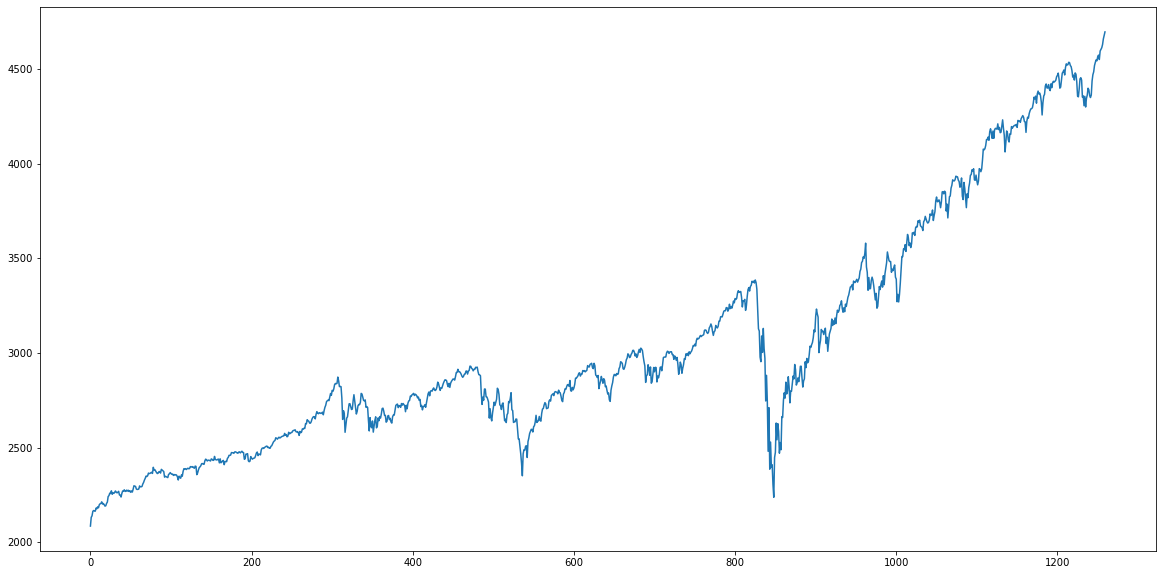

In [12]:
#Buy and hold S&P 500
url = 'https://query2.finance.yahoo.com/v8/finance/chart/%5EGSPC?formatted=true&crumb=LqSYCwMewDq&lang=en-US&region=US&includeAdjustedClose=true&interval=1d&period1=-1325635200&period2=1636243200&events=capitalGain|div|split&useYfid=true&corsDomain=finance.yahoo.com'
r = requests.get(url, headers=header)
soup = json.loads(str(BeautifulSoup(r.text, 'html.parser')))
closeList = soup['chart']['result'][0]['indicators']['quote'][0]['close'][-1260:]
closeList = [i for i in closeList if i != None]
changeInPrice = [np.log(closeList[i+1]/closeList[i]) for i in range(len(closeList)-1)]
negReturns = [i for i in changeInPrice if i<0]
print({
        'meanReturn' : np.mean(changeInPrice),
        'medianReturn' : np.median(changeInPrice),
        'sharpe' : (np.mean(changeInPrice)/np.std(changeInPrice))*np.sqrt(252),
        'absSharpe' : (abs(np.mean(changeInPrice))/np.std(changeInPrice))*np.sqrt(252),
        'sortino' : (np.mean(changeInPrice)/np.std(negReturns))*np.sqrt(252),
        'absSortino' : (abs(np.mean(changeInPrice))/np.std(negReturns))*np.sqrt(252),
        'totalNoOfDays' : len(changeInPrice)
    })
plt.plot(closeList)